# Proyecto Data Science II: Supply Chain Data

# Abstracto con Motivación y Audiencia

Este proyecto busca identificar los factores que influyen en los retrasos de entregas en una empresa del sector retail. A través del análisis de un dataset real de supply chain, se busca predecir cuándo un pedido podría llegar tarde y qué variables tienen mayor impacto en este resultado.

**Audiencia**: responsables de logística, analistas de operaciones y tomadores de decisión dentro del área de distribución y atención al cliente.


##1. Introducción Teórica

### 📦 Análisis de Entregas Tardías en Pedidos – Proyecto Data Science II

## 🧭 Introducción

En el contexto actual de los negocios, la **experiencia del cliente** y la **eficiencia logística** se han convertido en factores clave para mantener la competitividad. Las empresas que no logran cumplir con los tiempos de entrega pactados corren el riesgo de perder clientes, recibir malas calificaciones o enfrentar costos adicionales en devoluciones y compensaciones.

Este proyecto se enmarca en un análisis de datos históricos de una empresa del sector **retail**, la cual gestiona una gran cantidad de pedidos con diferentes combinaciones de productos, destinos, clases de envío, métodos de pago y segmentos de clientes.

La base de datos utilizada contiene miles de registros relacionados con el proceso comercial, incluyendo variables como:

- Fecha y método de pedido.
- Tipo de cliente y región geográfica.
- Modalidad de envío utilizada.
- Producto solicitado y categoría correspondiente.
- Tiempo de entrega y si fue puntual o con retraso.

El foco de este estudio está puesto en comprender **qué variables influyen en la probabilidad de que un pedido sea entregado fuera de término**, es decir, con retraso.

Para ello, se realizará un **Análisis Exploratorio de Datos (EDA)** y se construirán modelos predictivos que permitan anticipar estos retrasos. El objetivo final es transformar los datos en información valiosa para la **toma de decisiones estratégicas** dentro del negocio.

---

## 🎯 Objetivo del Proyecto

El objetivo principal es **identificar los factores que inciden en las entregas tardías** y construir un modelo predictivo que permita anticipar el riesgo de retraso en futuros pedidos.

Esto se logrará a través de un proceso analítico estructurado que incluye:

- La exploración y visualización de los datos.
- La formulación y validación de hipótesis estadísticas.
- La selección y transformación de variables.
- La implementación de algoritmos de Machine Learning.

A partir de los resultados, se podrán definir patrones y generar recomendaciones concretas para **optimizar la gestión logística**, tales como:

- Ajustar procesos de envío según el tipo de cliente o región.
- Rediseñar estrategias de distribución.
- Priorizar modalidades de transporte más confiables.
- Identificar segmentos de alto riesgo para implementar acciones preventivas.

De esta forma, se busca **reducir los retrasos**, mejorar la eficiencia operativa y elevar el nivel de satisfacción del cliente, posicionando a la empresa de forma más competitiva en su mercado.

---


## Preguntas/Hipótesis

1. ¿Influye el tipo de envío en la probabilidad de entrega tardía?
2. ¿Existen regiones con mayor proporción de retrasos?
3. ¿Los pedidos con mayores descuentos tienen más riesgo de retraso?
4. ¿Podemos predecir si un pedido será entregado tarde usando Machine Learning?


##2. Carga de librerías necesarias

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##3. Carga del dataset "Supply-Chain-Data.csv"

## Importación de Datos desde Fuente Pública

El dataset fue obtenido desde una fuente pública y cargado directamente mediante Python. Esto permite reproducir el análisis y garantiza acceso a los datos crudos.

> Fuente utilizada: [GitHub - Supply Chain Dataset](https://github.com)


In [ ]:
# URL del archivo .csv en GitHub
url = 'https://raw.githubusercontent.com/AlejoMuscaridolo/Supply-Chain-Dataset/refs/heads/main/DataCoSupplyChainDataset.csv'

# Cargar el archivo .csv en un DataFrame de pandas
# Se especifica la codificación 'latin1' o 'ISO-8859-1'
df = pd.read_csv(url, encoding='latin1')

## 4. Descripción de los datos


#### 4.1 Variables


1.   **Type:** Tipo de transacción realizada
2.  ** Days for shipping (real):** Días reales de envío del producto comprado
3.   **Days for shipment (scheduled):** Días programados para la entrega del producto comprado
4.   **Benefit per order:** Ganancias por pedido realizado
5.   **Sales per customer:** Ventas totales por cliente
6.   **Delivery Status:** Estado de entrega de los pedidos: Envío anticipado, Entrega tardía, Envío cancelado, Envío a tiempo
7.   **Late_delivery_risk:** Variable categórica que indica si el envío es tardío (1) o no es tardío (0)
8.   **Category Id:** Código de categoría del producto
9.   **Category Name:** Descripción de la categoría del producto
10.  **Customer City:** Ciudad donde el cliente realizó la compra
11.  **Customer Country:** País donde el cliente realizó la compra
12.  **Customer Id:** ID del cliente
13.  **Customer Segment:** Tipos de clientes: Consumidor, Corporativo, Oficina en casa
14.  **Customer State:** Estado al que pertenece la tienda donde se registró la compra
15.  **Customer Zipcode:** Código postal del cliente
16.  **Department Id:** Código de departamento de la tienda
17.  **Department Name:** Nombre del departamento de la tienda
18.  **Market:** Mercado al que se entrega el pedido: África, Europa, LATAM, Asia Pacífico, USCA
19.  **Order City:** Ciudad de destino del pedido
20.  **Order Country:** País de destino del pedido
21.  **Order Customer Id:** Código del pedido del cliente
22.  **order date (DateOrders):** Fecha en la que se realiza el pedido
23.  **Order Id:** Código del pedido
24.  Order Item Cardprod Id: Código del producto generado a través del lector RFID
25.  Order Item Discount: Valor de descuento del artículo del pedido
26.  Order Item Discount Rate: Porcentaje de descuento del artículo del pedido
27.  Order Item Id: Código del artículo del pedido
28.  Order Item Product Price: Precio de los productos sin descuento
29.  Order Item Profit Ratio: Relación de ganancia del artículo del pedido
30.  Order Item Quantity: Número de productos por pedido
31.  Sales: Valor en ventas
32.  Order Item Total: Monto total por pedido
33.  Order Profit Per Order: Ganancia por pedido
34.  Order Region: Región del mundo donde se entrega el pedido: Sudeste Asiático, Asia del Sur, Oceanía, Asia Oriental, Asia Occidental, Oeste de EE.UU., Centro de EE.UU., Oeste de África, África Central, Norte de África, Europa Occidental, Norte, Caribe, Sudamérica, África Oriental, Europa del Sur, Este de EE.UU., Canadá, África del Sur, Asia Central, Europa, América Central, Europa Oriental, Sur de EE.UU.
35.  Order State: Estado de la región donde se entrega el pedido
36.  Order Status: Estado del pedido: COMPLETO, PENDIENTE, CERRADO, PAGO PENDIENTE, CANCELADO, EN PROCESO, SOSPECHA DE FRAUDE, EN ESPERA, REVISIÓN DE PAGO
37.  Product Card Id: Código del producto
38.  Product Category Id: Código de la categoría del producto
39.  Product Description: Descripción del producto
40.  Product Name: Nombre del producto
41.  Product Price: Precio del producto
42.  Product Status: Estado del stock del producto: Si es 1 no está disponible, si es 0 el producto está disponible
43.  Shipping date (DateOrders): Fecha y hora exacta del envío
44.  Shipping Mode: Modos de envío disponibles: Clase Estándar, Primera Clase, Segunda Clase, Mismo Día







In [ ]:
pd.set_option('display.max_columns', None)
df.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Email,Customer Fname,Customer Id,Customer Lname,Customer Password,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Cally,20755,Holloway,XXXXXXXXX,Consumer,PR,5365 Noble Nectar Island,725.0,2,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,20755,1/31/2018 22:56,77202,1360,13.110000,0.04,180517,327.75,0.29,1,327.75,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Irene,19492,Luna,XXXXXXXXX,Consumer,PR,2679 Rustic Loop,725.0,2,Fitness,18.279451,-66.037064,Pacific Asia,Bikaner,India,19492,1/13/2018 12:27,75939,1360,16.389999,0.05,179254,327.75,-0.80,1,327.75,311.359985,-249.089996,South Asia,Rajastán,PENDING,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,EE. UU.,XXXXXXXXX,Gillian,19491,Maldonado,XXXXXXXXX,Consumer,CA,8510 Round Bear Gate,95125.0,2,Fitness,37.292233,-121.881279,Pacific Asia,Bikaner,India,19491,1/13/2018 12:06,75938,1360,18.030001,0.06,179253,327.75,-0.80,1,327.75,309.720001,-247.779999,South Asia,Rajastán,CLOSED,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,EE. UU.,XXXXXXXXX,Tana,19490,Tate,XXXXXXXXX,Home Office,CA,3200 Amber Bend,90027.0,2,Fitness,34.125946,-118.291016,Pacific Asia,Townsville,Australia,19490,1/13/2018 11:45,75937,1360,22.940001,0.07,179252,327.75,0.08,1,327.75,304.809998,22.860001,Oceania,Queensland,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Orli,19489,Hendricks,XXXXXXXXX,Corporate,PR,8671 Iron Anchor Corners,725.0,2,Fitness,18.253769,-66.037048,Pacific Asia,Townsville,Australia,19489,1/13/2018 11:24,75936,1360,29.500000,0.09,179251,327.75,0.45,1,327.75,298.250000,134.210007,Oceania,Queensland,PENDING_PAYMENT,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 53 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Type                           40000 non-null  object 
 1   Days for shipping (real)       40000 non-null  int64  
 2   Days for shipment (scheduled)  40000 non-null  int64  
 3   Benefit per order              40000 non-null  float64
 4   Sales per customer             40000 non-null  float64
 5   Delivery Status                40000 non-null  object 
 6   Late_delivery_risk             40000 non-null  int64  
 7   Category Id                    40000 non-null  int64  
 8   Category Name                  40000 non-null  object 
 9   Customer City                  40000 non-null  object 
 10  Customer Country               40000 non-null  object 
 11  Customer Email                 40000 non-null  object 
 12  Customer Fname                 40000 non-null 

## 5. Análisis Exploratorio de Datos (EDA)

###5.1 Definición de hipótesis

1) Algún método de pago (Type) tiene mayores probabilidades de entrega tardía que otros.

2) Los pedidos correspondientes a algún departamento en particular (Department Name) tienen más probabilidades de entrega tardía.

3) Algún segmento de clientes (Costumer Segment) está presentando más probabilidades de entregas tardías que otros.

4) Alguna región (Order region) tiene más probabilidades de entregas tardías que otros.

4) Algún mercado (Market) tiene más probabilidades de entregas tardías que otros.

5) Alguna clase de envío (Shipping Mode) tiene más probabilidades de entregas tardías que las otras.

6) Alguna categoría en particular (Category Name) esta teniendo mayor probabilidad de realizar envíos tardíos que otros.

Nivel de Confiabilidad (NC): 95%

alpha = 1- NC = 0.05


####5.1.1 Análisis Univariado

Revisaremos:

*   Distribución de variables numéricas (Order Item Quantity, Order Profit Per Order).
*   Frecuencias de variables categóricas (Type, Category Name, Customer City, Customer Country, Shipping Mode).



######5.1.1.1 Distribución de variables numéricas

Variable Order Item Quantity

Función para graficar tasa de entrega tardía

Se puede calcular tasas de entrega tardía definiendo intervalos para las variables numéricas con el objetivo de extraer información relevante del análisis.

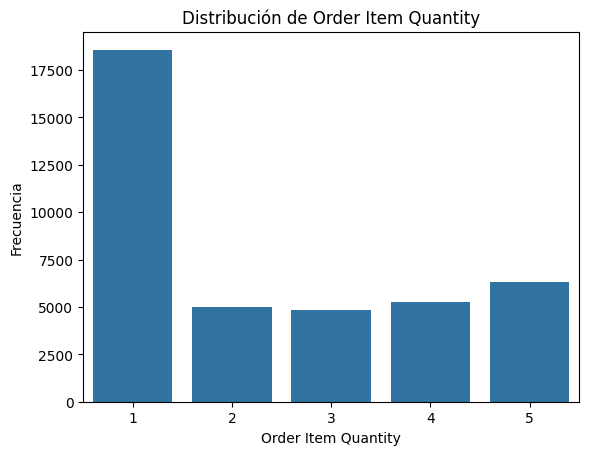

In [ ]:
sns.countplot(x=df['Order Item Quantity'])
plt.title('Distribución de Order Item Quantity')
plt.xlabel('Order Item Quantity')
plt.ylabel('Frecuencia')
plt.show()

Los pedidos compuestos por 1 ítem son los más frecuentes.

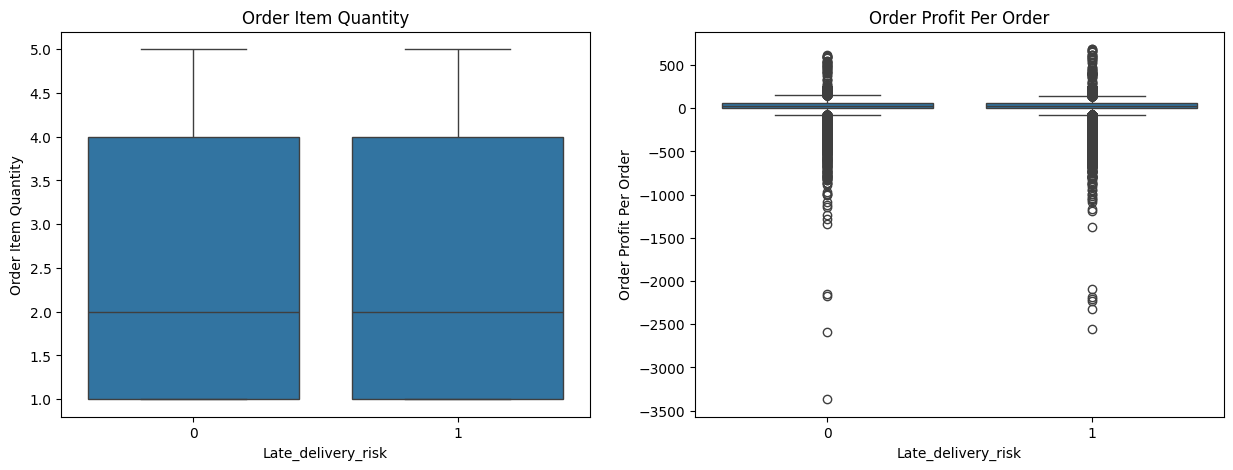

In [ ]:
col_num = ['Order Item Quantity', 'Order Profit Per Order']

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
fig.subplots_adjust(hspace=0.25)

for i, col in enumerate(col_num): # ciclo for recorriendo las columnas 1 y 2 de col_num
  bplt=sns.boxplot(x="Late_delivery_risk", y=col, data=df, ax=ax[i]) # Uso i como índice
  ax[i].set_title(col)

En el boxplot para Order Item Quantity, puede observarse que el

In [ ]:
def graficar_tasa_LateDeliveryRisk(var_predictora,var_predecir,type='line',Order=None):
    x, y = var_predictora, var_predecir

    # Generar agrupaciones (groupby), calcular tasa de conversión (mean),
    grupo = df.groupby(x)[y].mean().rename('tasa_late').reset_index()

    # Y generar gráfica
    if type=='line': # Útil para rangos continuos
        plt.figure(figsize=(10,6))
        sns.lineplot(x=var_predictora, y='tasa_late', data=grupo)
        plt.grid()
    elif type=='bar': # Útil si los datos están divididos en rangos o son categóricos
        plt.figure(figsize=(14,6))
        sns.barplot(x=var_predictora, y='tasa_late', data=grupo)
        plt.grid()
    elif type=='scatter': # Útil si los datos están divididos en rangos o son categóricos
        plt.figure(figsize=(10,6))
        sns.scatterplot(x=var_predictora, y='tasa_late', data=grupo)
        plt.grid()

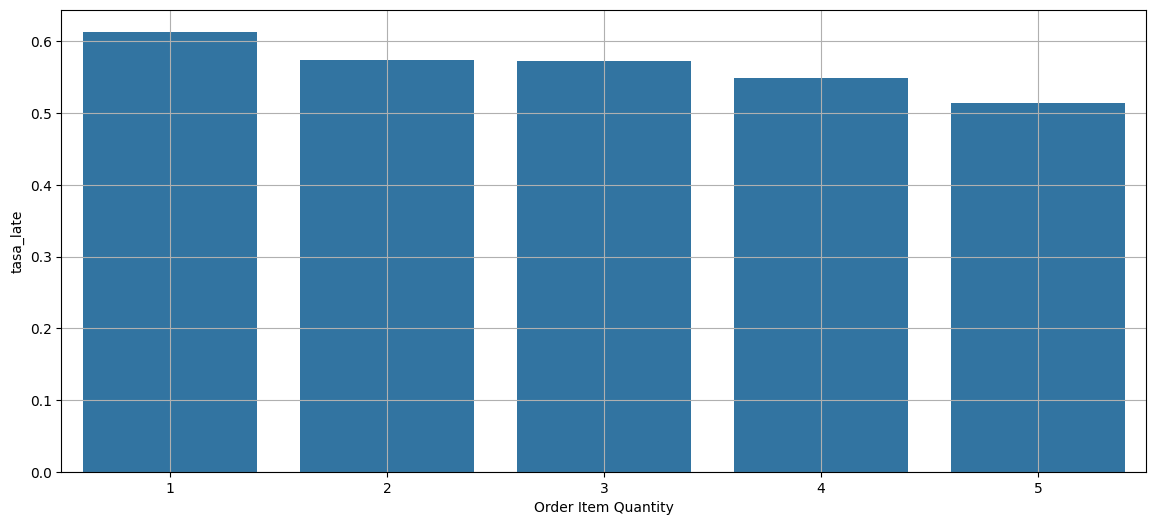

In [ ]:
# Graficar tasas de conversión para la variable Order Item Quantity
graficar_tasa_LateDeliveryRisk(var_predictora='Order Item Quantity',var_predecir='Late_delivery_risk',type='bar')

Dado que se observan diferencias en las tasas de entrega tardía, se pueden establecer 3 rangos:

*   1 ítem
*   2-4 ítems
*   5 ítems

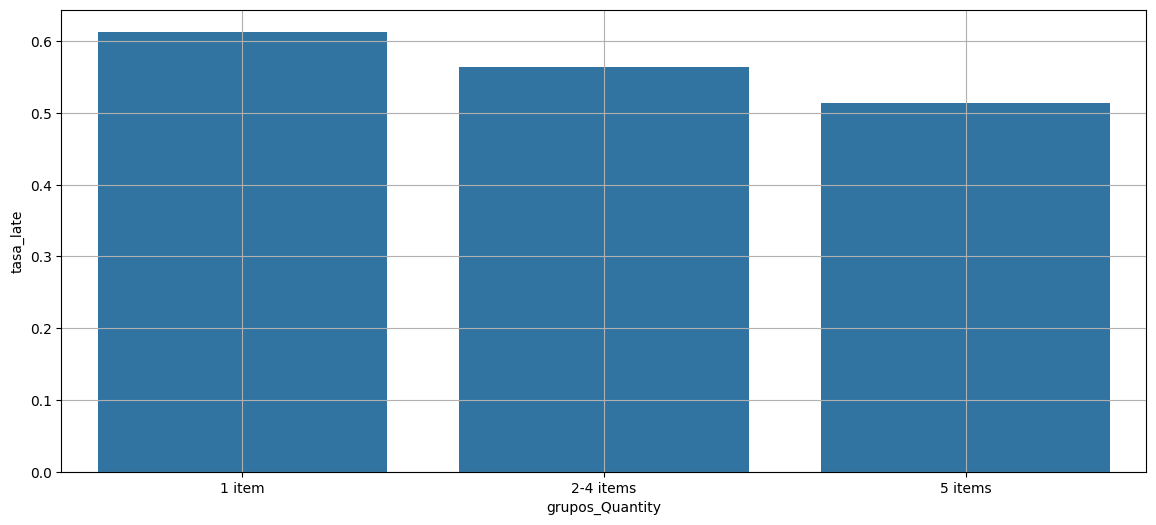

In [ ]:
# Creemos subbrupos de cantidades y calculemos las tasas de entrega tardía en cada caso

# Nueva columna en el dataset: "grupos_Quantity"
df.loc[:,'grupos_Quantity'] = "1 item"
df.loc[(df['Order Item Quantity']>=2)&(df['Order Item Quantity']<=4), 'grupos_Quantity'] = "2-4 items"
df.loc[df['Order Item Quantity']>4,'grupos_Quantity'] = "5 items"


# Y grafiquemos la tasa de conversión para esta nueva columna
graficar_tasa_LateDeliveryRisk('grupos_Quantity','Late_delivery_risk',type='bar')

Ahora puede notarse una leve diferencia en la tasa_late para los distintos grupos, siendo los pedidos de 1 ítem los que mayor tasa de entregas tardías tienen.

In [ ]:
# Y eliminemos la columna "Order Item Quantity" (dejando sólo los grupos de Quantity)
df.drop(columns=['Order Item Quantity'], inplace=True)

Variable Order Profit Per Order

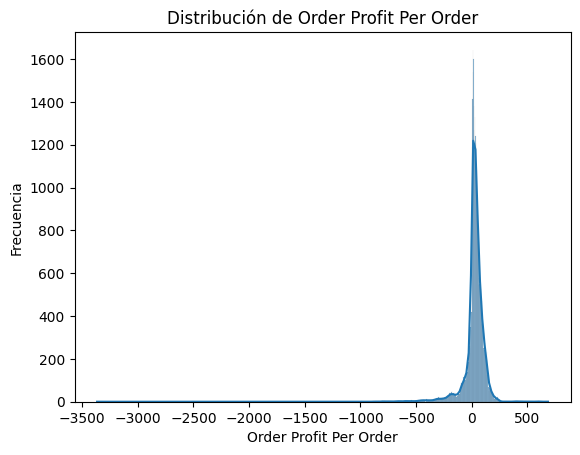

Media: 21.353449497807325
Mediana: 29.25
Desviación estándar: 106.05653078667056


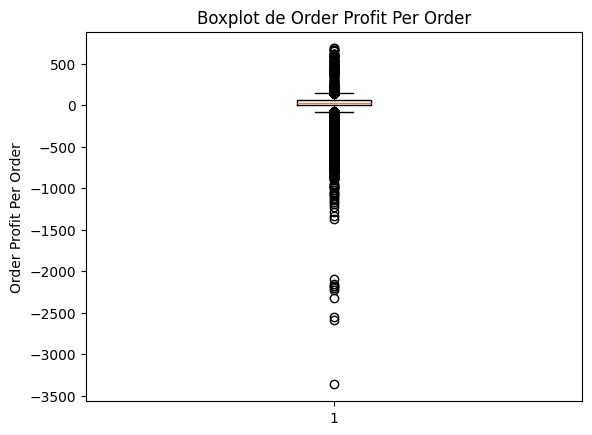

In [ ]:
sns.histplot(df['Order Profit Per Order'], kde=True)
plt.title('Distribución de Order Profit Per Order')
plt.xlabel('Order Profit Per Order')
plt.ylabel('Frecuencia')
plt.show()

print(f"Media: {df['Order Profit Per Order'].mean()}")
print(f"Mediana: {df['Order Profit Per Order'].median()}")
print(f"Desviación estándar: {df['Order Profit Per Order'].std()}")
plt.boxplot(df['Order Profit Per Order'])
plt.title('Boxplot de Order Profit Per Order')
plt.ylabel('Order Profit Per Order')
plt.show()

Puede observarse en el gráfico boxplot que la variable Order Profit per Order cuenta con muchos outliers (valores que se alejan de la mediana mas de 1.5 veces la desviación estandar).

Sin embargo la mayoría de los valores rondan por 21.35 (media), donde se forma una campana.

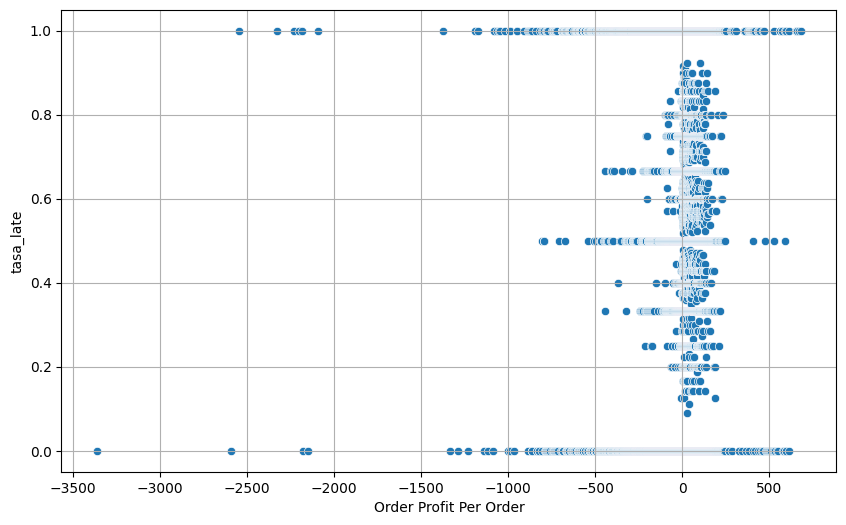

In [ ]:
# Graficar tasas de conversión para la variable Order Profit Per Order
graficar_tasa_LateDeliveryRisk(var_predictora='Order Profit Per Order',var_predecir='Late_delivery_risk',type='scatter')

No se pueden observar patrones facilmente. Se opta por definir diferentes rangos, para segmentar la información:

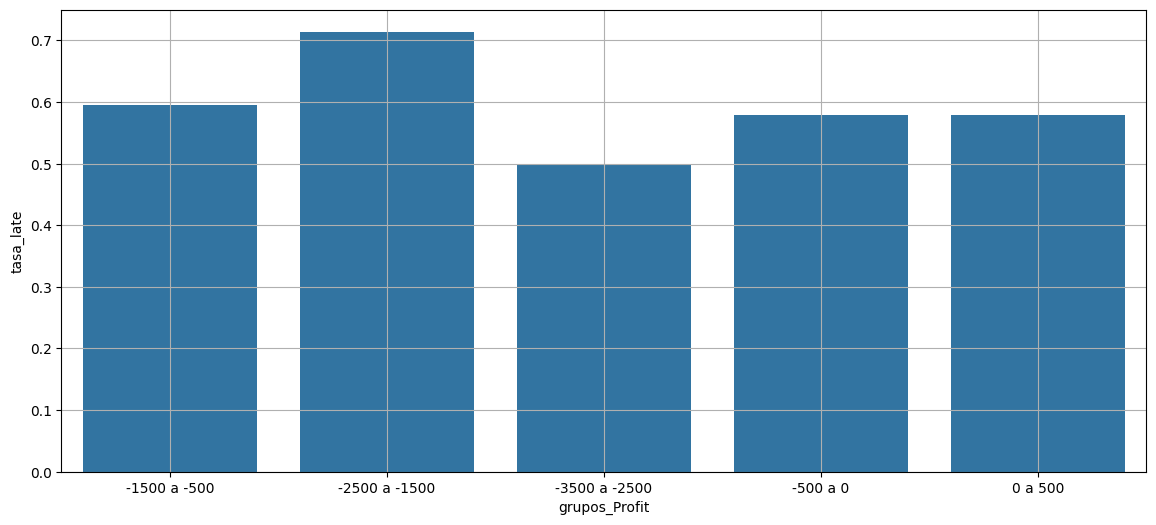

In [ ]:
# -3500 a -2500
# -2500 a -1500
# -1500 a -500
# -500 a 0
# 0 a 500
# >500

df.loc[:,'grupos_Profit'] = "0 a 500"
df.loc[(df['Order Profit Per Order']>-500)&(df['Order Profit Per Order']<0), 'grupos_Profit'] = "-500 a 0"
df.loc[df['Order Profit Per Order']<=-500,'grupos_Profit'] = "-3500 a -2500"
df.loc[(df['Order Profit Per Order']>-2500)&(df['Order Profit Per Order']<-1500), 'grupos_Profit'] = "-2500 a -1500"
df.loc[(df['Order Profit Per Order']>-1500)&(df['Order Profit Per Order']<-500), 'grupos_Profit'] = "-1500 a -500"

orden = ['-3500 a -2500','-2500 a -1500','-1500 a -500','-500 a 0','0 a 500','>500']
graficar_tasa_LateDeliveryRisk('grupos_Profit','Late_delivery_risk',type='bar',Order=orden)

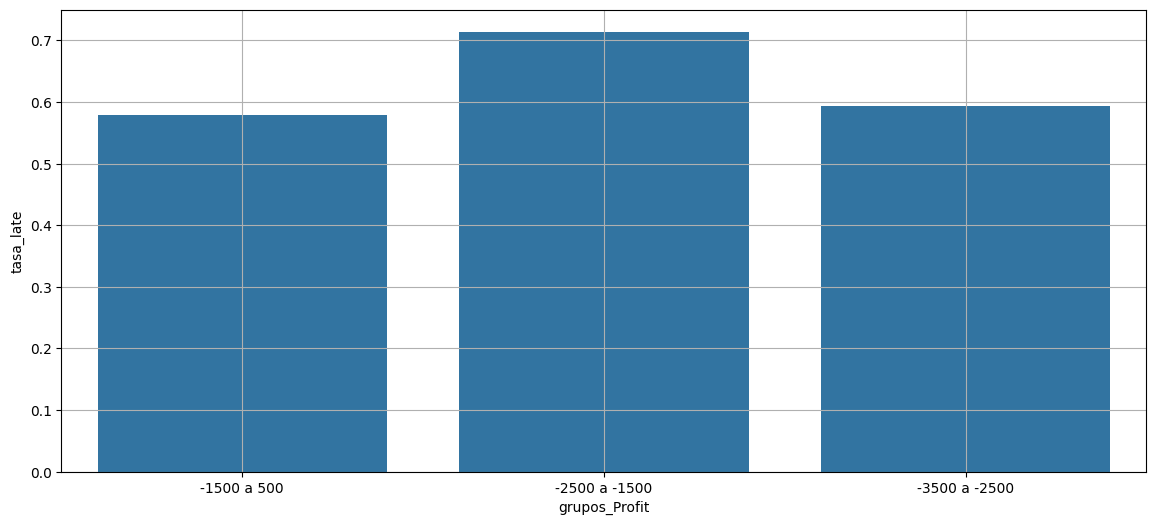

In [ ]:
# Reagrupo dado que no hay diferencia significativa de tasa entre los grupos -500 a 0 y 0 a 500

# -3500 a -2500
# -2500 a -1500
# -1500 a 500


df.loc[:,'grupos_Profit'] = "-1500 a 500"
df.loc[df['Order Profit Per Order']<=-500,'grupos_Profit'] = "-3500 a -2500"
df.loc[(df['Order Profit Per Order']>-2500)&(df['Order Profit Per Order']<-1500), 'grupos_Profit'] = "-2500 a -1500"

orden = ['-3500 a -2500','-2500 a -1500','-1500 a 500','>500']
graficar_tasa_LateDeliveryRisk('grupos_Profit','Late_delivery_risk',type='bar',Order=orden)

In [ ]:
# Y eliminemos la columna "Order Profit Per Order" (dejando sólo los grupos de Profit)
df.drop(columns=['Order Profit Per Order'], inplace=True)

#####5.1.1.2 Frecuencias de variables categóricas

Con la funcion "freq_tbl" se podrá observar en cada variable categórica la frecuencia, porcentaje y porcentaje acumulado de cada etiqueta.

In [ ]:
!pip install funpymodeling
from funpymodeling.exploratory import freq_tbl
freq_tbl(df)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 101.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.6/204.6 kB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 325.3/325.3 kB 18.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 18.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.6/62.6 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1 MB 102.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 113.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 469.0/469.0 kB 34.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.1/69.1 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38

Conclusiones de variables categóricas:

*   Type: puede observarse que la mayoría de las ordenes se pagan con débito.
*   Delivery Status: el 57% de los pedidos tienen una entrega tardía. Sólo el 17% se entregan en el tiempo programado.
*   Category Name: entre 6 categorías, se concentra la mayor parte de los pedidos (posteriormente puede visualizar el % acumulado en dichas categorías con un diagrama de Pareto).
*   Costumer Country: la mayor parte de los pedidos se realizan para clientes de Estados Unidos.
*   Costumer Segment: El 88% de los pedidos se concentran en consumidores finales y Corporativos.
*   Department Name: el 84% de los pedidos se concentran en sólo 4 departamentos.
*   Market: El 80% de los pedidos se concentran entre Europe, LATAM y Pacific Asia.
*   Order Region: se limitará el análisis a aquellas regiones que representen un porcentaje acumulado cercano al 80% de los pedidos.
*   Product Name: Se limitará el análisis a aquellos productos que representen un porcentaje acumulado cercano al 80% de los pedidos.
*   Shipping Mode:La mayoría de los envíos se realizan en Standard Class.

Variables excluidas del análisis:
*   Costumer City
*   Costumer State
*   Order City
*   Order Country
*   Costumer State
*   Order State





<ipython-input-17-3660249301>:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=90)
<ipython-input-17-3660249301>:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=90)
<ipython-input-17-3660249301>:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=90)
<ipython-input-17-3660249301>:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=90)
<ipython-input-17-3660249301>:12: UserWarning: set_ticklabels() should only be used with a fixed number 

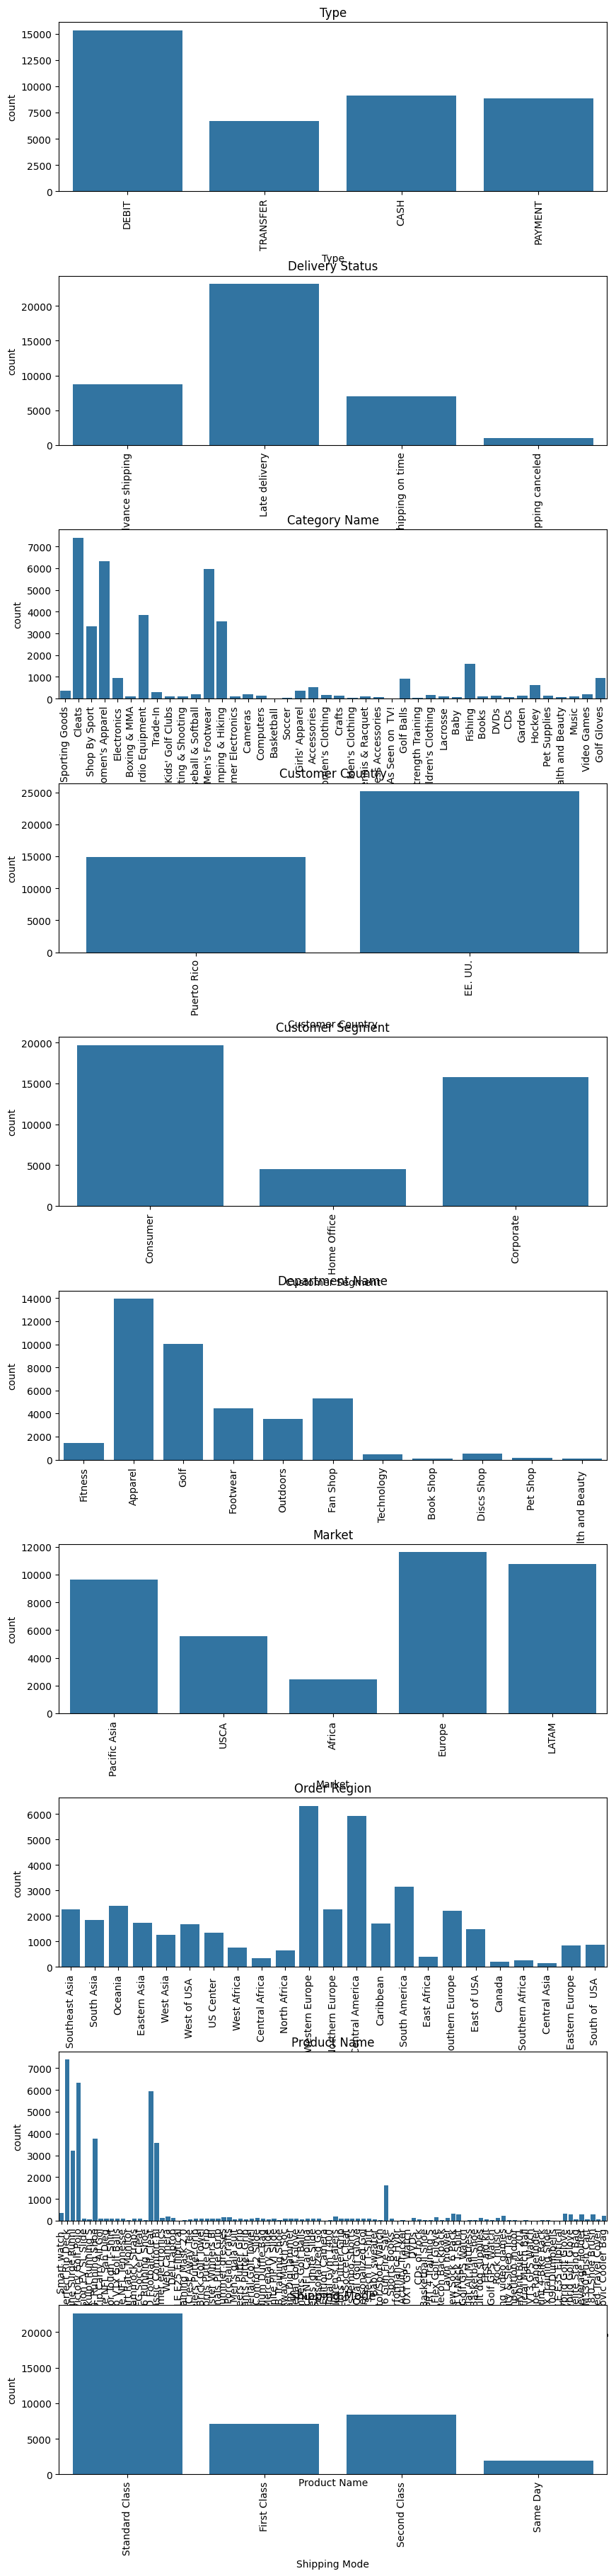

In [ ]:


Variables_categoricas = ['Type', 'Delivery Status', 'Category Name',
                         'Customer Country', 'Customer Segment',
                         'Department Name', 'Market', 'Order Region',
                         'Product Name', 'Shipping Mode']

fig, ax= plt.subplots(nrows=len(Variables_categoricas), ncols=1, figsize=(10, 45))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(Variables_categoricas):
    sns.countplot(x=col, data=df, ax=ax[i])
    ax[i].set_title(col)
    ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=90)
plt.show()


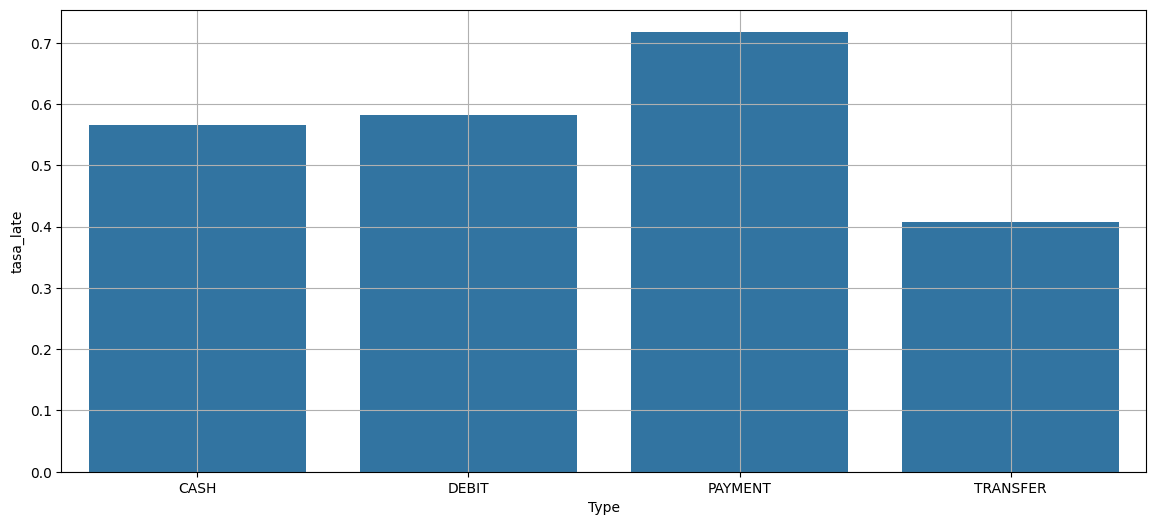

In [ ]:
graficar_tasa_LateDeliveryRisk('Type','Late_delivery_risk',type='bar')

El método de pago Payment tiene mayores probabilidades de entregas tardías que el resto de métodos.

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41],
 [Text(0, 0, 'Accessories'),
  Text(1, 0, 'As Seen on  TV!'),
  Text(2, 0, 'Baby '),
  Text(3, 0, 'Baseball & Softball'),
  Text(4, 0, 'Basketball'),
  Text(5, 0, 'Books '),
  Text(6, 0, 'Boxing & MMA'),
  Text(7, 0, 'CDs '),
  Text(8, 0, 'Cameras '),
  Text(9, 0, 'Camping & Hiking'),
  Text(10, 0, 'Cardio Equipment'),
  Text(11, 0, "Children's Clothing"),
  Text(12, 0, 'Cleats'),
  Text(13, 0, 'Computers'),
  Text(14, 0, 'Consumer Electronics'),
  Text(15, 0, 'Crafts'),
  Text(16, 0, 'DVDs'),
  Text(17, 0, 'Electronics'),
  Text(18, 0, 'Fishing'),
  Text(19, 0, 'Fitness Accessories'),
  Text(20, 0, 'Garden'),
  Text(21, 0, "Girls' Apparel"),
  Text(22, 0, 'Golf Balls'),
  Text(23, 0, 'Golf Gloves'),
  Text(24, 0, 'Health and Beauty'),
  Text(25, 

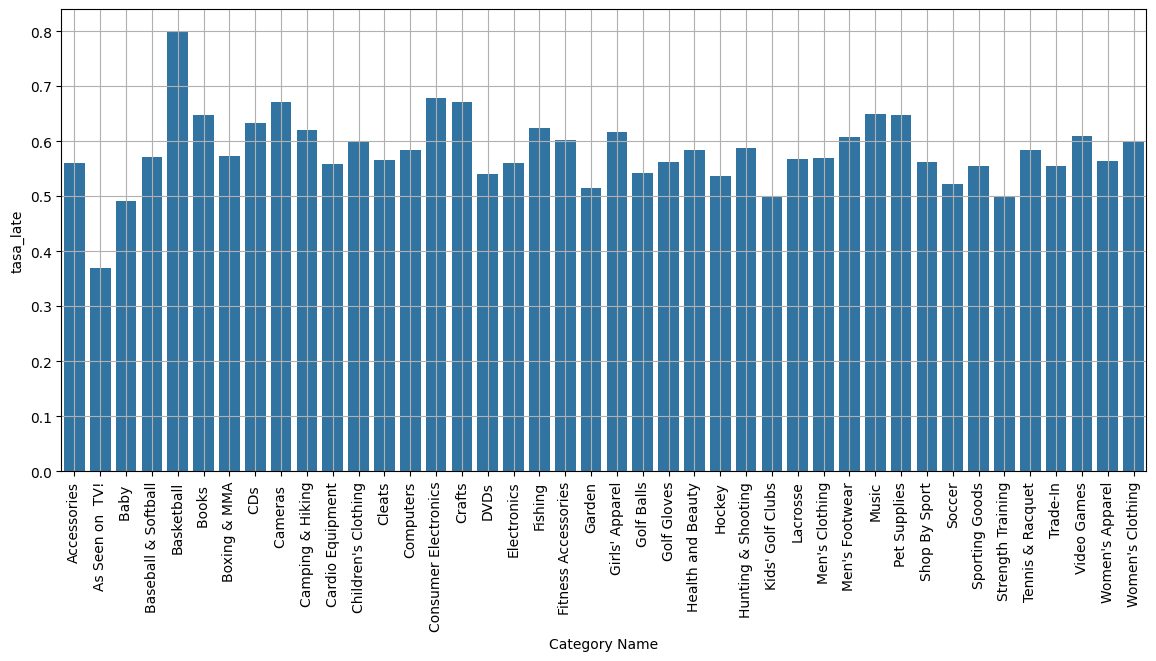

In [ ]:
graficar_tasa_LateDeliveryRisk('Category Name','Late_delivery_risk',type='bar')
plt.xticks(rotation=90)

La categoría Basketball cuenta con mayores probabilidades de entregas tardías que el resto de categorías.

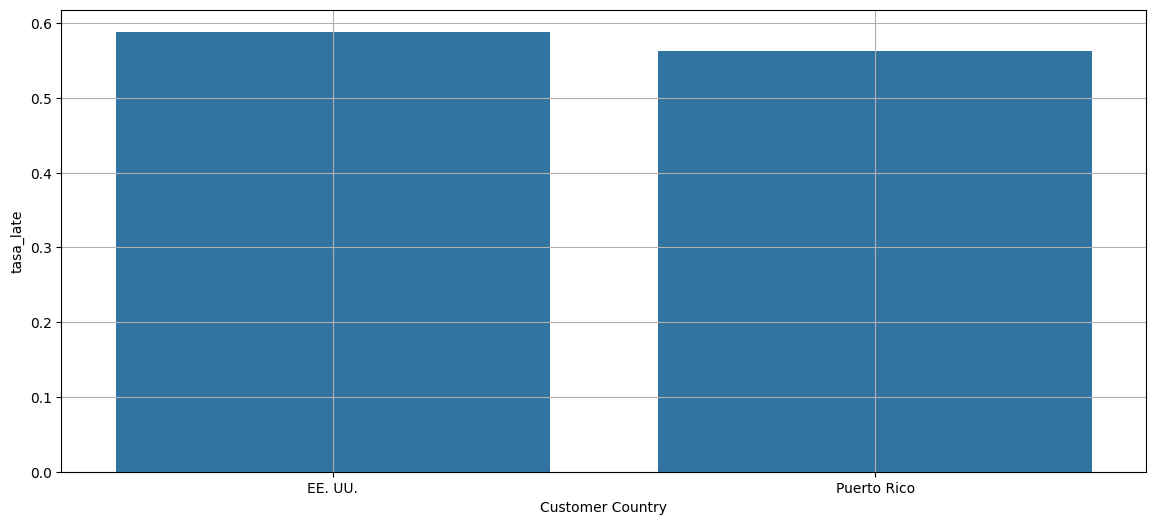

In [ ]:
graficar_tasa_LateDeliveryRisk('Customer Country','Late_delivery_risk',type='bar')

Las diferencias entre los distintos países son mínimas, por lo que no parece ser una variable significativa para el análisis de entregas tardías.

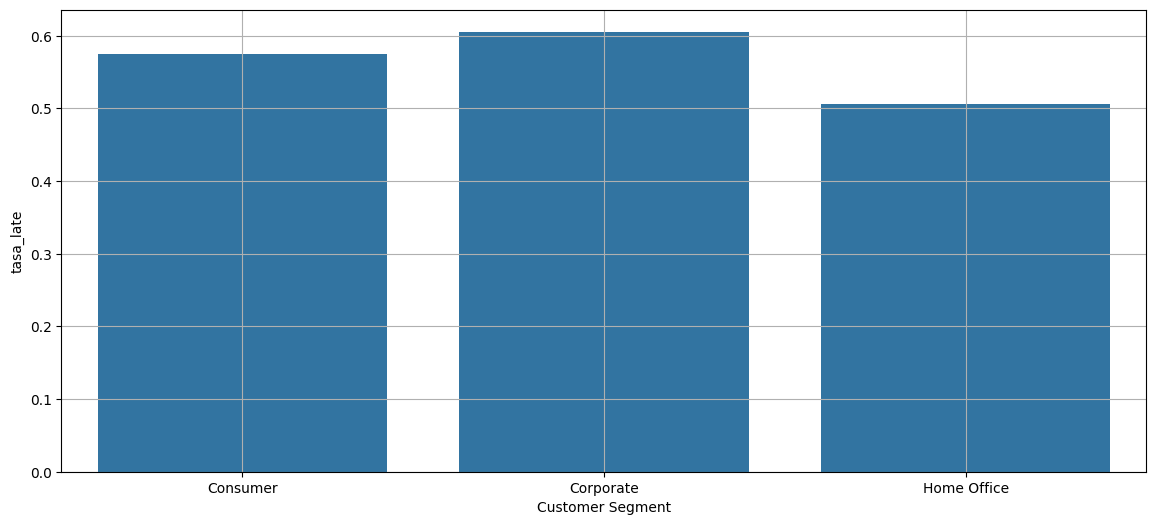

In [ ]:
graficar_tasa_LateDeliveryRisk('Customer Segment','Late_delivery_risk',type='bar')

Las diferencias entre los distintos segmentos de clientes son mínimas, por lo que no parece ser una variable significativa para el análisis de entregas tardías.

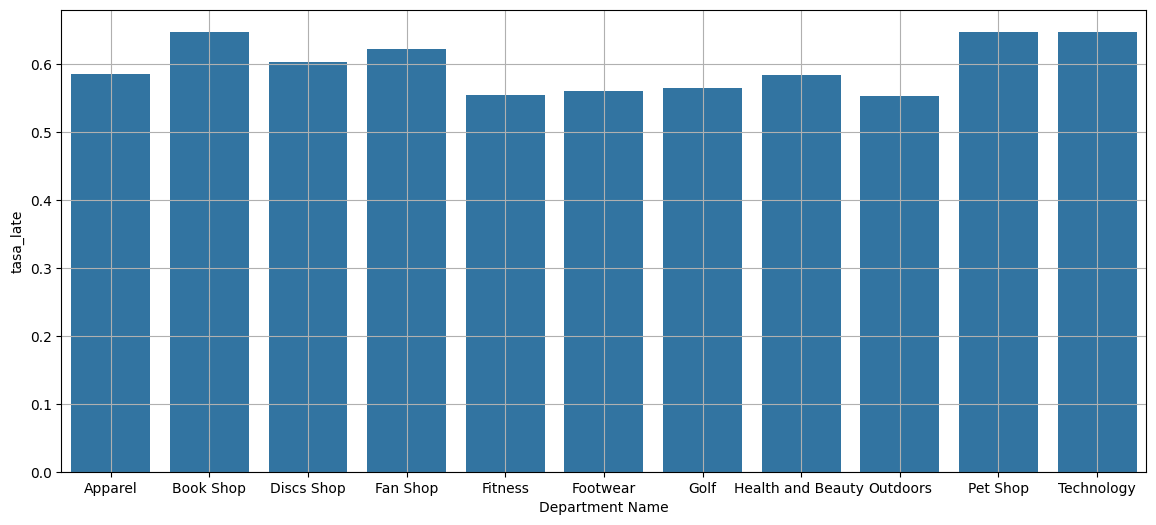

In [ ]:
graficar_tasa_LateDeliveryRisk('Department Name','Late_delivery_risk',type='bar')

Los departamentos de Book Shoop, Pet shop y Technology cuentan con una probabilidad de entrega tardía ligeramente superior al resto de departamentos. Sin embargo, el departamento no parece ser una variable determinante de las entregas tardías.

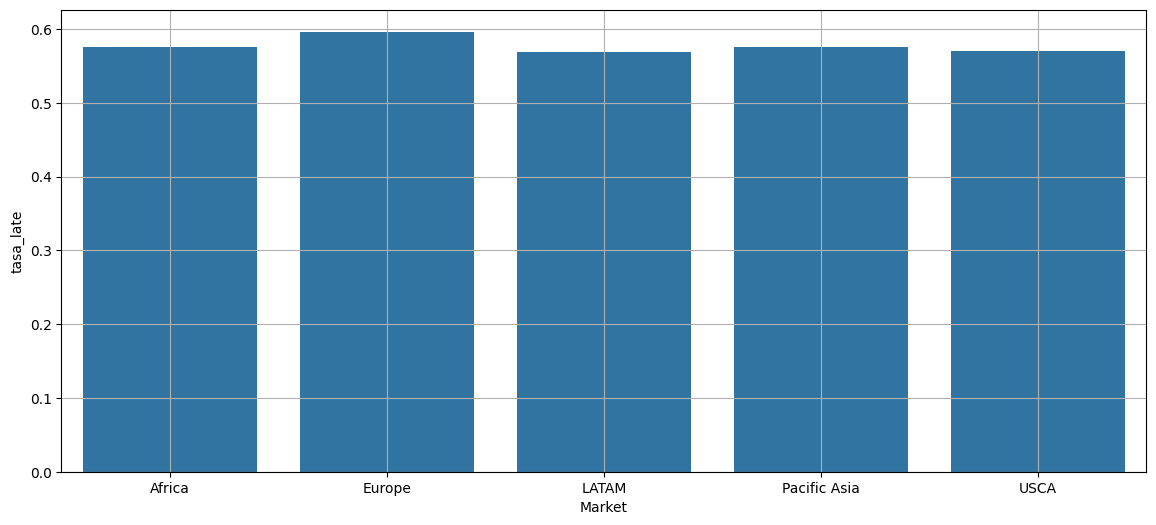

In [ ]:
graficar_tasa_LateDeliveryRisk('Market','Late_delivery_risk',type='bar')

Los distintos mercados no parecen tener una inferencia significativa en las entregas tardías (al menos de forma aislada).

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22],
 [Text(0, 0, 'Canada'),
  Text(1, 0, 'Caribbean'),
  Text(2, 0, 'Central Africa'),
  Text(3, 0, 'Central America'),
  Text(4, 0, 'Central Asia'),
  Text(5, 0, 'East Africa'),
  Text(6, 0, 'East of USA'),
  Text(7, 0, 'Eastern Asia'),
  Text(8, 0, 'Eastern Europe'),
  Text(9, 0, 'North Africa'),
  Text(10, 0, 'Northern Europe'),
  Text(11, 0, 'Oceania'),
  Text(12, 0, 'South America'),
  Text(13, 0, 'South Asia'),
  Text(14, 0, 'South of  USA '),
  Text(15, 0, 'Southeast Asia'),
  Text(16, 0, 'Southern Africa'),
  Text(17, 0, 'Southern Europe'),
  Text(18, 0, 'US Center '),
  Text(19, 0, 'West Africa'),
  Text(20, 0, 'West Asia'),
  Text(21, 0, 'West of USA '),
  Text(22, 0, 'Western Europe')])

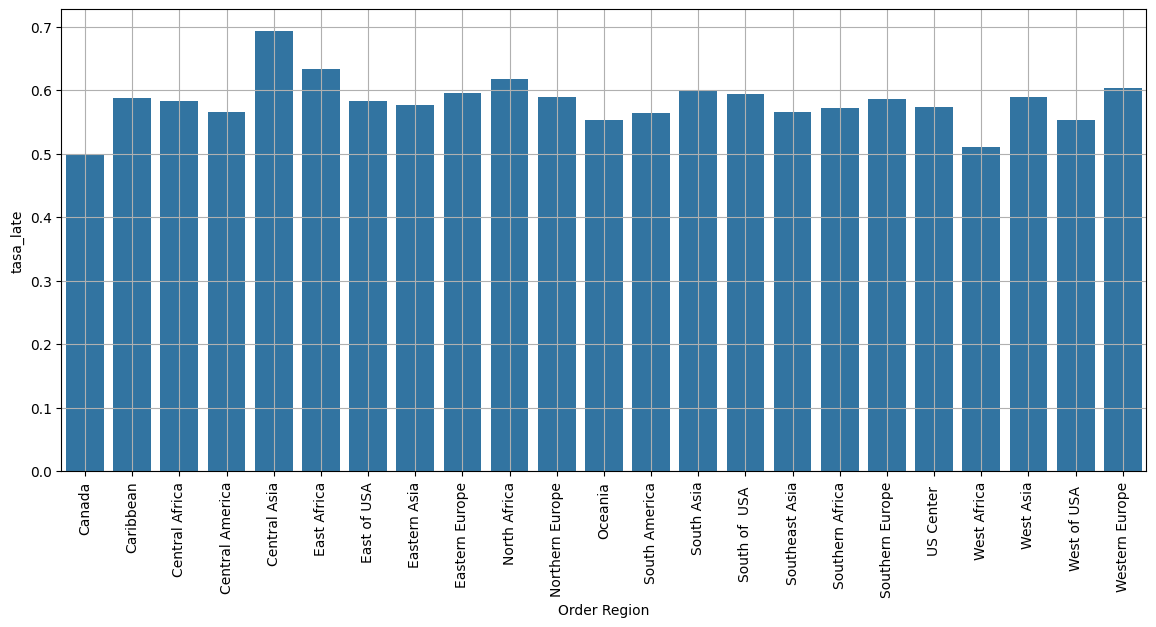

In [ ]:
graficar_tasa_LateDeliveryRisk('Order Region','Late_delivery_risk',type='bar')
plt.xticks(rotation=90)

La región de Asia central cuenta con una probabilidad mayor de entrega tardía que el resto de regiones.

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97],
 [Text(0, 0, 'Adult dog supplies'),
  Text(1, 0, 'Baby sweater'),
  Text(2, 0, 'Bag Boy Beverage Holder'),
  Text(3, 0, 'Bag Boy M330 Push Cart'),
  Text(4, 0, 'Bowflex SelectTech 1090 Dumbbells'),
  Text(5, 0, 'Bridgestone e6 Straight Distance NFL Carolina'),
  Text(6, 0, 'Bridgestone e6 Straight Distance NFL San Dieg'),
  Text(7, 0, 'Bridgestone e6 Straight Distance NFL Tennesse'),
  Text(8, 0, "Brooks Women's Ghost

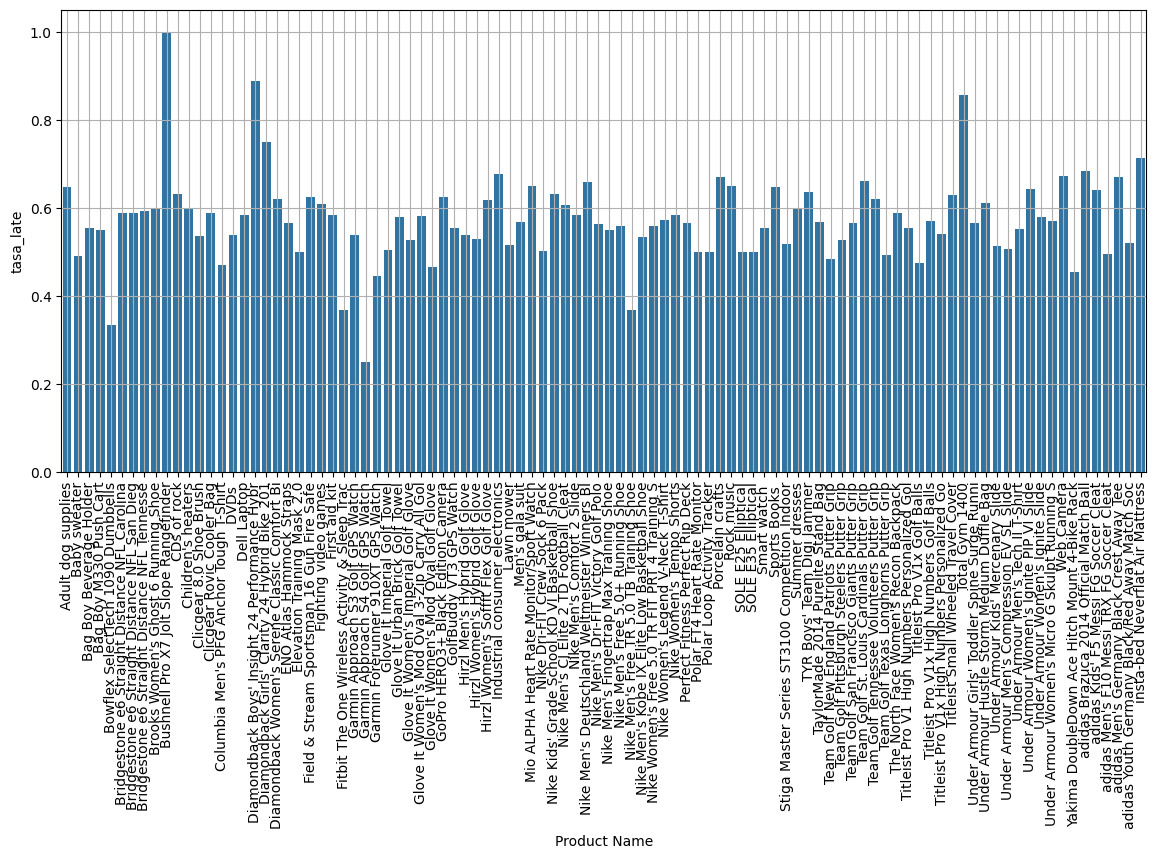

In [ ]:
graficar_tasa_LateDeliveryRisk('Product Name','Late_delivery_risk',type='bar')
plt.xticks(rotation=90)

El producto "Bushnell Pro X7 Jolt Slope Rangefinder" tiene una tasa de entrega tardía del 100%

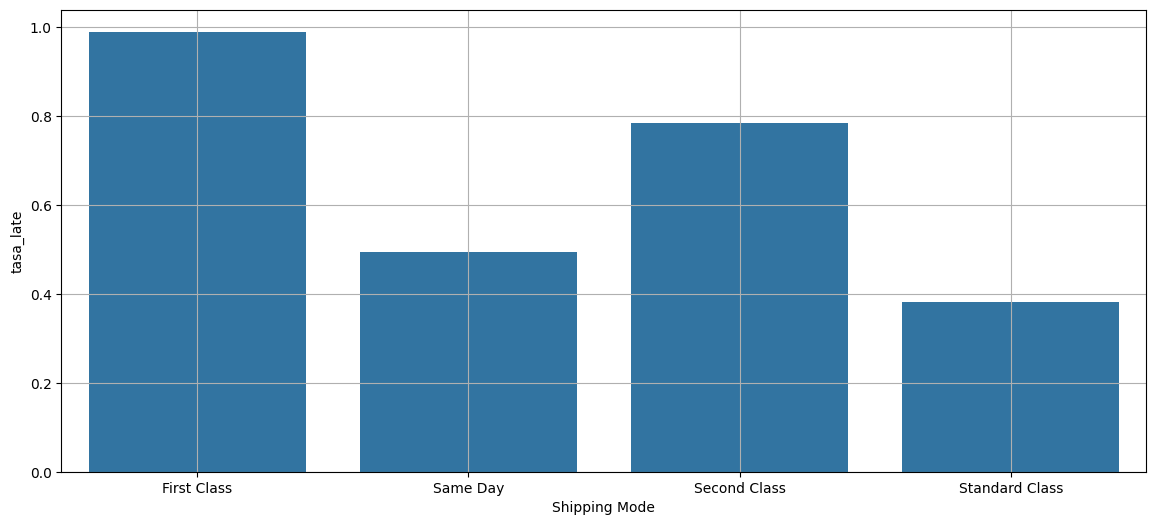

In [ ]:
graficar_tasa_LateDeliveryRisk('Shipping Mode','Late_delivery_risk',type='bar')

El tipo de envío First Class tiene probabilidades mucho mayores de entrega tardía que el resto de tipos de envío.

###5.1.2 Análisis bivariado

In [ ]:
# Tasa de entrega tardía para dos columnas
def graficar_tl_bivariada(col_list, orden=None):
  tl = df.groupby(col_list)['Late_delivery_risk'].mean().to_frame().reset_index()

  # Gráfica
  plt.figure(figsize=(13,7))
  ax = sns.pointplot(x=tl['Late_delivery_risk'], y=tl[col_list[0]], hue=tl[col_list[1]], join=False, order=orden)
  ax.yaxis.grid(True)
  ax.xaxis.grid(True)
  plt.title(f'Tasa_late para {col_list[0]} y {col_list[1]}')
  plt.xlabel('Tasa_late (%)')
  plt.xlim((0,1));

<ipython-input-27-2817526494>:7: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  ax = sns.pointplot(x=tl['Late_delivery_risk'], y=tl[col_list[0]], hue=tl[col_list[1]], join=False, order=orden)


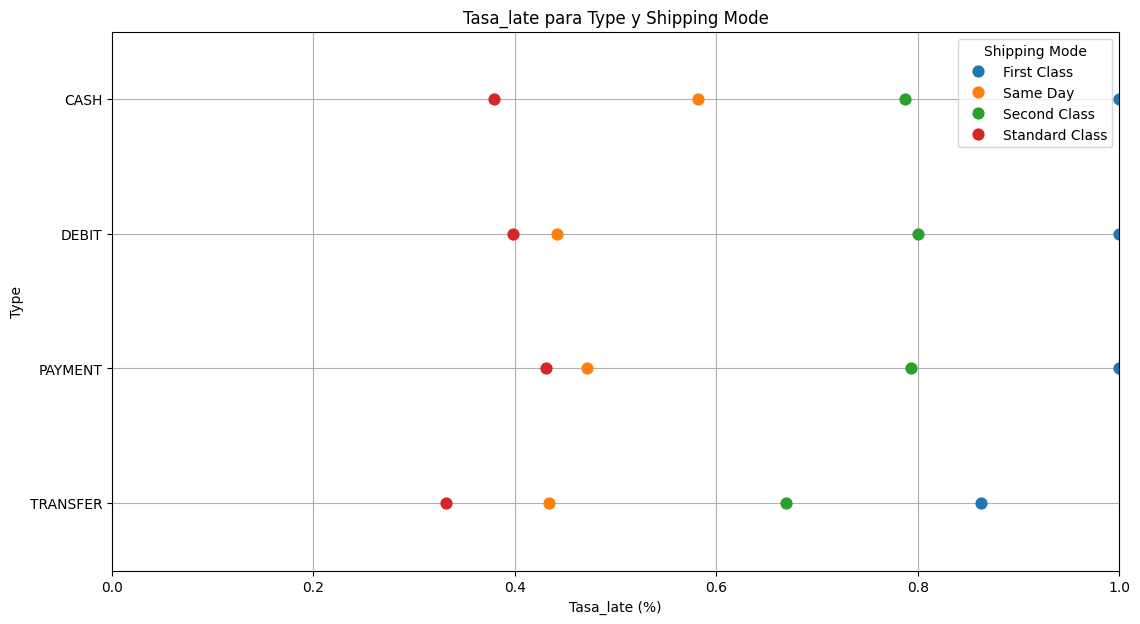

In [ ]:
# 1. Par Type - Shipping Mode
graficar_tl_bivariada(['Type','Shipping Mode'])

El método de pago "CASH" para entregas en el mismo día (Same Day) cuenta con una probabilidad de entrega tardía mayor (~60%) que el resto de métodos de pago.

<ipython-input-27-2817526494>:7: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  ax = sns.pointplot(x=tl['Late_delivery_risk'], y=tl[col_list[0]], hue=tl[col_list[1]], join=False, order=orden)


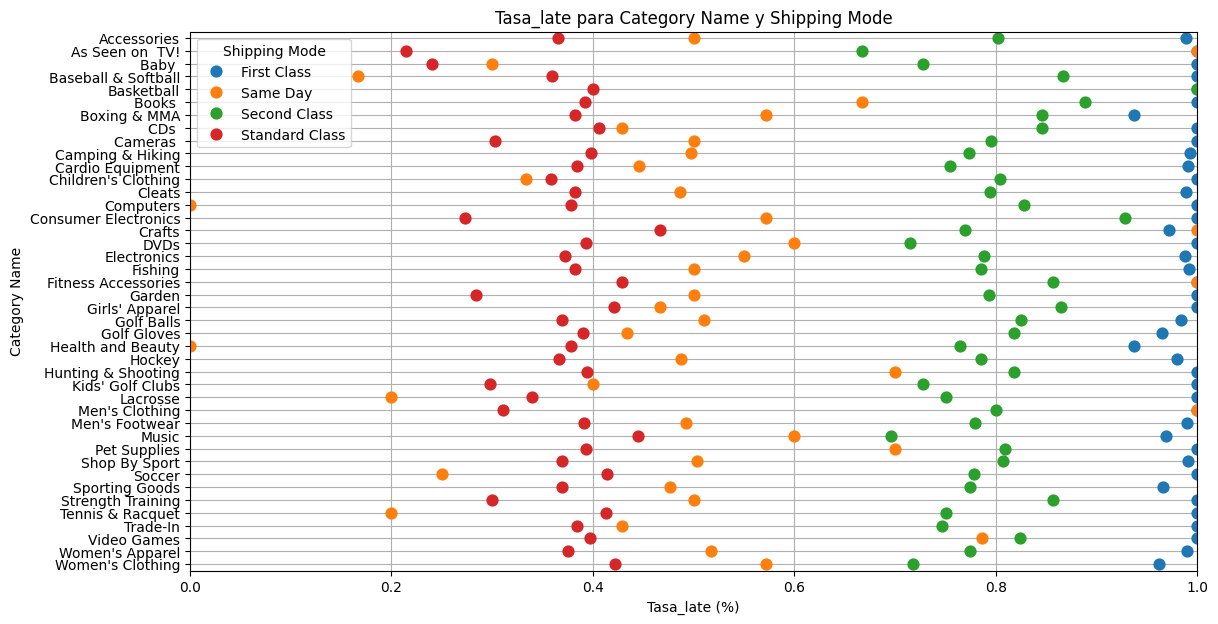

In [ ]:
# 2. Par Category Name - Shipping Mode
graficar_tl_bivariada(['Category Name','Shipping Mode'])

La combinacion de categoría "Basketball" y Second Class, tiene una probabilidad muy alta de entrega tardía (~100%).

Para entregas en el mismo día (Same Day) de las categorías "As seen on TV!", "Crafts", "Fitness Accesories" y "Men's Clothing" tienen probabilidades muy altas de entrega tardía (~100%).

<ipython-input-27-2817526494>:7: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  ax = sns.pointplot(x=tl['Late_delivery_risk'], y=tl[col_list[0]], hue=tl[col_list[1]], join=False, order=orden)


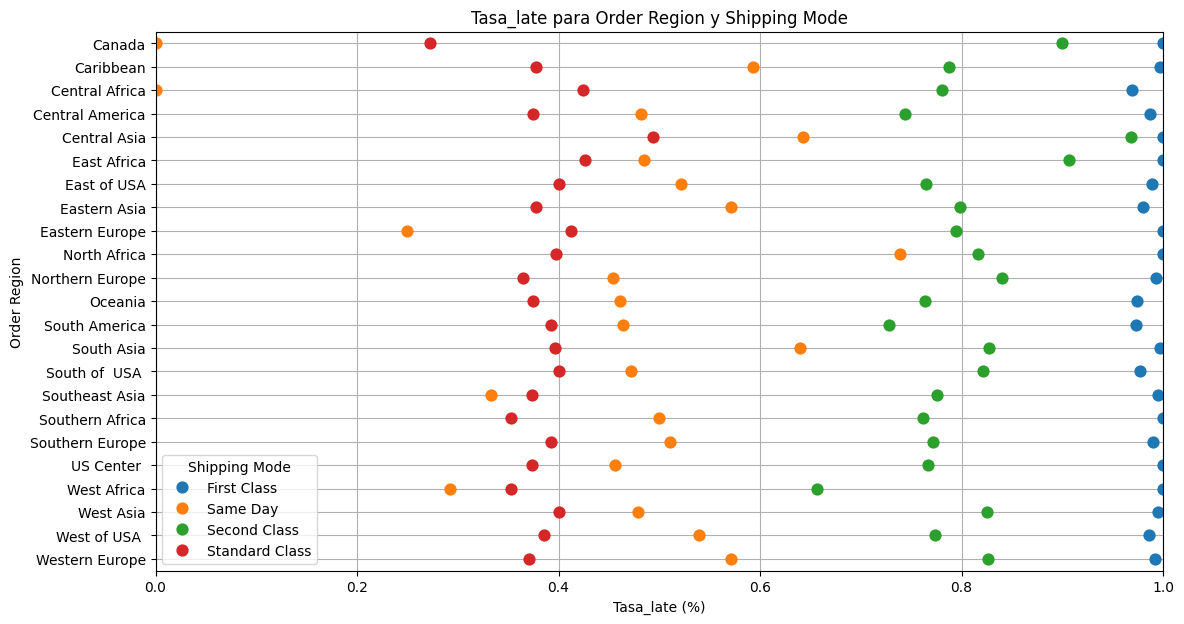

In [ ]:
# 3. Par Order Region - Shipping Mode
graficar_tl_bivariada(['Order Region','Shipping Mode'])

Las entregas a Asia central con el tipo de envío Second Class, tienen mayor probabilidad (~95%) de entrega tardía que el resto de regiones con ese mismo tipo de envío.

Lo mismo ocurre con Asia central (~50%) para el tipo de envío Standard Class.

Lo mismo ocurre con África del Norte (~75%) para el tipo de envío en el mismo día (Same Day).



<ipython-input-27-2817526494>:7: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  ax = sns.pointplot(x=tl['Late_delivery_risk'], y=tl[col_list[0]], hue=tl[col_list[1]], join=False, order=orden)


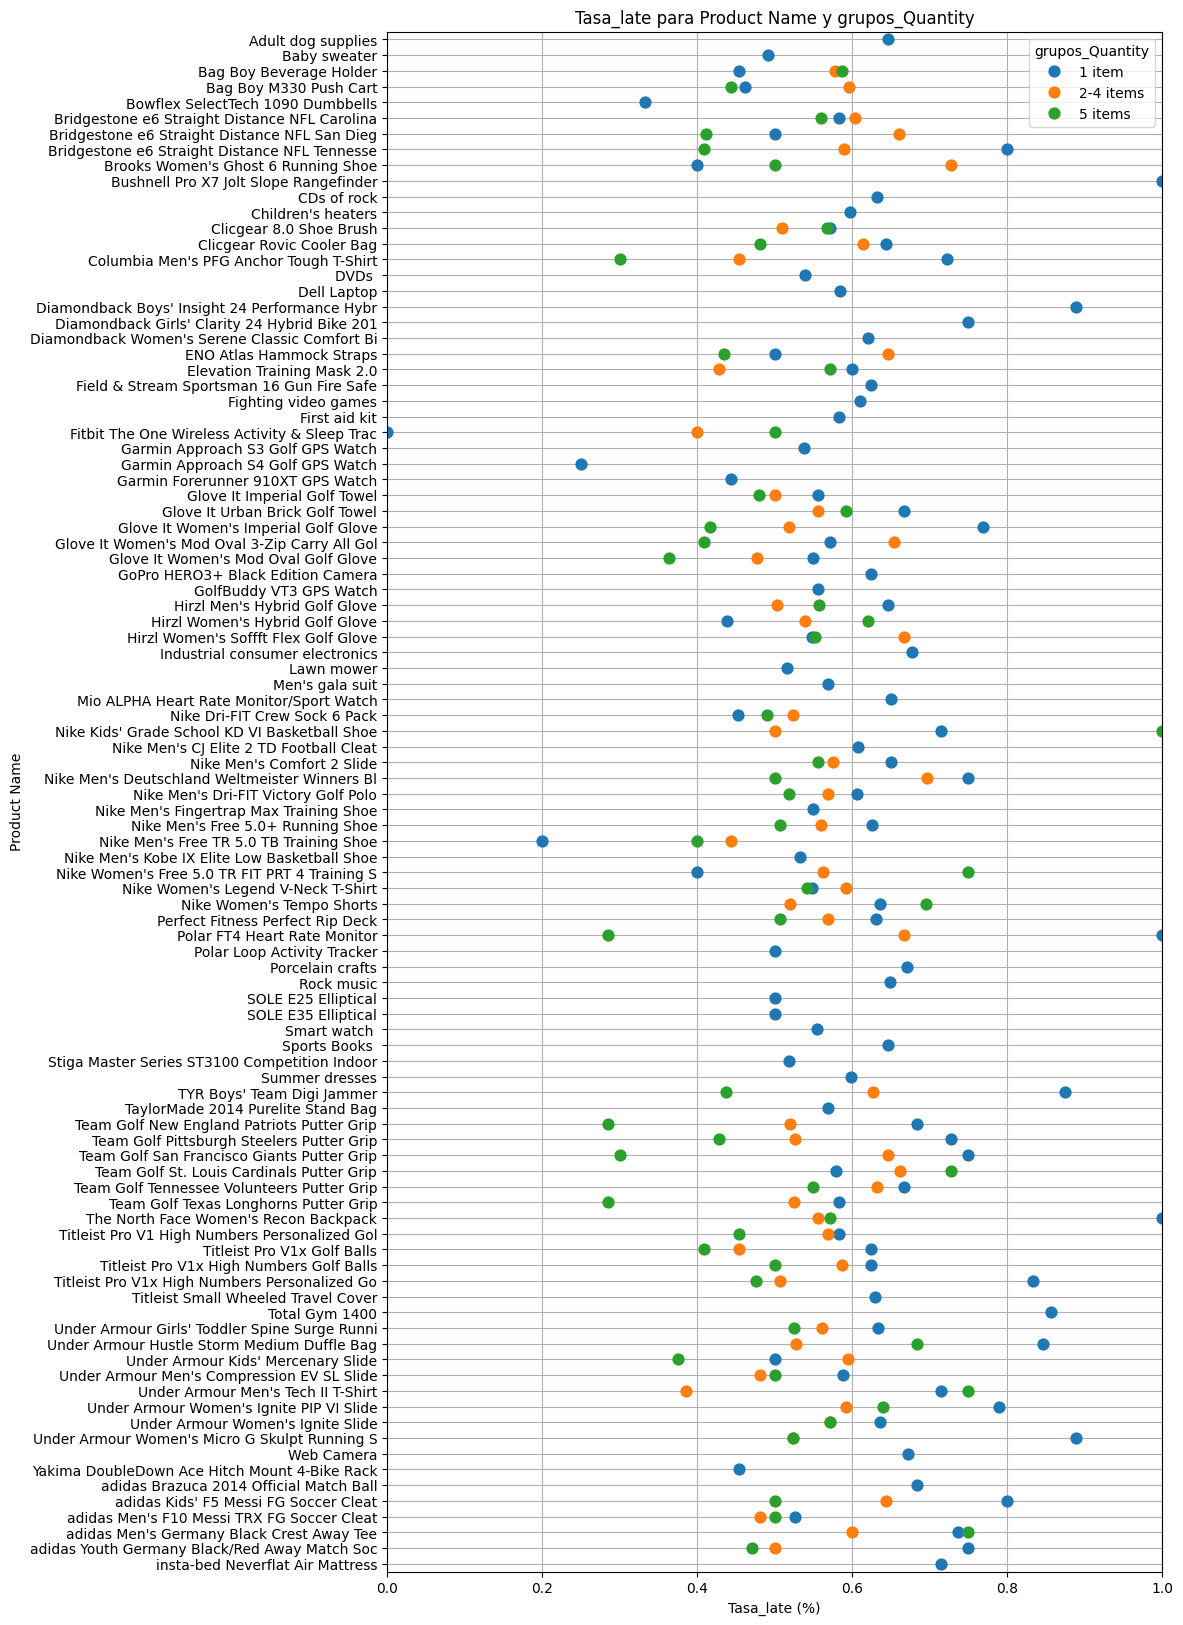

In [ ]:
# 4. Par Grupos_Quantity - Product Name
graficar_tl_bivariada(['Product Name', 'grupos_Quantity'])
plt.gcf().set_size_inches(10, 20)

Cuando se ordena 1 solo ítem de los productos: "The North Face Women´s Recon Backpack", "Polar FT4 Heart Rate Monitor", "Nike Kids' Grade School KD VI Basketball Shoe" y "Bushnell Pro X7 Jolt Slope Rangefinder", hay muy altas probabilidades (~100%) de entrega tardía.

### **Análisis de Probabilidades de Entrega Tardía por Diferentes Factores**  

#### **1) Método de Pago (`Type`)**  
¿Algún método de pago tiene mayores probabilidades de entrega tardía que otros?  
  
- El método de pago **Payment** tiene una mayor probabilidad de entrega tardía en comparación con el resto de los métodos.  

---  

#### **2) Departamento (`Department Name`)**  
¿Los pedidos correspondientes a algún departamento en particular tienen más probabilidades de entrega tardía?  

- No se encontraron diferencias significativas entre los departamentos en relación con la probabilidad de entrega tardía.  

---  

#### **3) Segmento de Clientes (`Customer Segment`)**  
¿Algún segmento de clientes está presentando más probabilidades de entregas tardías que otros?  

- El segmento **Corporate** tiene probabilidades de entrega tardía ligeramente mayores en comparación con los demás segmentos.  

---  

#### **4) Región (`Order Region`)**  
¿Alguna región tiene más probabilidades de entregas tardías que otras?  
  
- La región de **Asia Central** presenta una mayor probabilidad de entrega tardía respecto a las demás regiones.  
- Para el tipo de entrega **Same Day**, la región de **África del Norte** cuenta con una mayor probabilidad de entrega tardía en comparación con las demás regiones.  

---  

#### **5) Mercado (`Market`)**  
¿Algún mercado tiene más probabilidades de entregas tardías que otros?  

- El **mercado (Market)** no tiene una influencia significativa en la probabilidad de entrega tardía.  

---  

#### **6) Clase de Envío (`Shipping Mode`)**  
¿Alguna clase de envío tiene más probabilidades de entregas tardías que las otras?  
  
- El tipo de envío **Standard Class** presenta probabilidades de entrega tardía **notoriamente mayores** en comparación con los demás tipos de envío.  

---  

## **7) Categoría del Producto (`Category Name`)**  
¿Alguna categoría en particular está teniendo mayor probabilidad de realizar envíos tardíos que otras?  

- La categoría **Basketball** presenta probabilidades de entrega tardía **significativamente mayores** respecto a las demás categorías.  

## **8) Nombre del Producto (`Product Name`)**  
¿Algún producto en particular está teniendo mayor probabilidad de realizar envíos tardíos que otras?  

- Los productos "The North Face Women's Recon Backpack", "Polar FT4 Heart Rate Monitor", "Nike Kids' Grade School KD VI Basketball Shoe" y "Bushnell Pro X7 Jolt Slope Rangefinder" presentan probabilidades de entrega tardía **significativamente mayores** respecto a las demás categorías, cuando el pedido cuenta con 1 único ítem.  

###Codificación de variables categóricas

Una vez finalizado el EDA, procedo a realizar la codificación numérica para aquellas variables categóricas con el objetivo de poder incorporarlas en el modelo prodictivo que será desarrollado.

In [ ]:
pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 4.9 MB/s eta 0:00:00


Metodo para conversión de variables categóricas **Ordinales** a numéricas:

'K-mean target encoding'

## Ventajas del K-means Target Encoding

- **Captura patrones**: Agrupa categorías similares según su relación con la variable objetivo, mejorando la capacidad predictiva.
- **Reduce dimensionalidad**: Evita la explosión de columnas típica del One-Hot Encoding.
- **Previene overfitting**: Al agrupar categorías, se reduce el riesgo de sobreajuste en modelos con muchas clases.
- **Evita sesgo vinculado a la variable objetivo**: Dado que el valor numérico de cada categoría no es obtenido a partir del valor del target (a diferencia del target encoding) evita que los valores numéricos contengan parte de la información del mismo, sesgando las respuestas del modelo.
- **Escalable y flexible**: Funciona bien con muchas categorías y puede ajustarse fácilmente variando el número de clusters.




In [ ]:
import category_encoders as ce
from sklearn.model_selection import KFold

# Definimos tus columnas categóricas
categorical_cols = ['Type', 'Delivery Status', 'Category Name', 'Customer City',
                    'Customer Country', 'Customer Segment', 'Customer State',
                    'Department Name', 'Market', 'Order City', 'Order Country',
                    'Order Region', 'Order State', 'Order Status', 'Product Name',
                    'Shipping Mode', 'grupos_Quantity', 'grupos_Profit']

# Separar X (features) e y (target)
X = df.drop(columns='Late_delivery_risk').copy()
y = df['Late_delivery_risk'].copy()

# Creamos una copia para aplicar encoding
X_encoded = X.copy()

# Inicializamos el encoder
target_encoder = ce.TargetEncoder(cols=categorical_cols, smoothing=0.3)

# Creamos un KFold para evitar leakage
kf = KFold(n_splits=5, shuffle=True, random_state=42)


# Aplicamos el encoding por fold
for train_idx, val_idx in kf.split(X):
    target_encoder.fit(X.iloc[train_idx], y.iloc[train_idx])
    # The transform method returns a DataFrame, so we need to assign to the same slice of the DataFrame
    X_encoded.loc[val_idx, categorical_cols] = target_encoder.transform(X.iloc[val_idx])[categorical_cols]

# Finalmente, reemplazamos el dataframe original
df_encoded = X_encoded.copy()
df_encoded['Late_delivery_risk'] = y  # Volvemos a añadir la variable target

In [ ]:
#elimino las variables que no son de interes para mi análisis, debido a que no aportan información
# de ningún tipo por ser datos personales de clientes, columnas de ID y columnas con links.
variables_descartadas=['Customer Email','Customer Fname','Customer Id',
                       'Customer Lname','Customer Password','Customer Street',
                       'Customer Zipcode','Order Customer Id', 'Order Zipcode',
                       'Product Image','Category Id','Customer Id','Department Id',
                       'Order Customer Id','Order Id','Order Item Cardprod Id',
                       'Order Item Id','Product Card Id','Product Category Id']
df_cleaned=df_encoded.drop(columns=variables_descartadas)
pd.set_option('display.max_columns', None) #muestra todas las columnas sin ocultar ninguna
df_cleaned.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Category Name,Customer City,Customer Country,Customer Segment,Customer State,Department Name,Latitude,Longitude,Market,Order City,Order Country,order date (DateOrders),Order Item Discount,Order Item Discount Rate,Order Item Product Price,Order Item Profit Ratio,Sales,Order Item Total,Order Region,Order State,Order Status,Product Description,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode,grupos_Quantity,grupos_Profit,Late_delivery_risk
0,0.578244,3,4,91.250000,314.640015,0.0,0.565517,0.560491,0.560842,0.57518,0.560842,0.558645,18.251453,-66.037056,0.579485,0.423077,0.519497,1/31/2018 22:56,13.110000,0.04,327.75,0.29,327.75,314.640015,0.564258,0.520548,0.579246,NaN,0.565517,327.75,0,2/3/2018 22:56,0.38345,0.613395,0.579938,0
1,0.40518,5,4,-249.089996,311.359985,1.0,0.545139,0.567139,0.5672,0.577579,0.5672,0.541418,18.279451,-66.037064,0.578221,0.579969,0.593914,1/13/2018 12:27,16.389999,0.05,327.75,-0.80,327.75,311.359985,0.599174,0.59375,0.466954,NaN,0.545139,327.75,0,1/18/2018 12:27,0.381544,0.614422,0.579798,1
2,0.565719,4,4,-247.779999,309.720001,0.0,0.539286,0.565517,0.58612,0.575054,0.580815,0.550131,37.292233,-121.881279,0.570723,0.578031,0.594049,1/13/2018 12:06,18.030001,0.06,327.75,-0.80,327.75,309.720001,0.59216,0.590909,0.565719,NaN,0.539286,327.75,0,1/17/2018 12:06,0.377589,0.61383,0.578011,0
3,0.582671,3,4,22.860001,304.809998,0.0,0.566308,0.582168,0.589881,0.497108,0.582926,0.569099,34.125946,-118.291016,0.575891,0.296296,0.559605,1/13/2018 11:45,22.940001,0.07,327.75,0.08,327.75,304.809998,0.554849,0.584475,0.584881,NaN,0.566308,327.75,0,1/16/2018 11:45,0.381781,0.613166,0.579452,0
4,0.721445,2,4,134.210007,298.250000,0.0,0.545139,0.567139,0.5672,0.602983,0.5672,0.541418,18.253769,-66.037048,0.578221,0.25,0.552948,1/13/2018 11:24,29.500000,0.09,327.75,0.45,327.75,298.250000,0.555556,0.576577,0.719862,NaN,0.545139,327.75,0,1/15/2018 11:24,0.381544,0.614422,0.579798,0


In [ ]:
df_cleaned['order date (DateOrders)']=pd.to_datetime(df_cleaned['order date (DateOrders)'])
df_cleaned['shipping date (DateOrders)']=pd.to_datetime(df_cleaned['shipping date (DateOrders)'])

df_cleaned['Order Month']= df_cleaned['order date (DateOrders)'].dt.month
df_cleaned['Shipping Month'] = df_cleaned['shipping date (DateOrders)'].dt.month
df_cleaned=df_cleaned.drop(columns=['order date (DateOrders)'])
df_cleaned=df_cleaned.drop(columns=['shipping date (DateOrders)'])

Se tomó la decisión de eliminar la variable df['Product Description'] debido a que el 100% de sus valores son nulos.

In [ ]:
df_cleaned = df_cleaned.drop(columns=['Product Description'])

In [ ]:
df_cleaned.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Category Name,Customer City,Customer Country,Customer Segment,Customer State,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Item Discount,Order Item Discount Rate,Order Item Product Price,Order Item Profit Ratio,Sales,Order Item Total,Order Region,Order State,Order Status,Product Name,Product Price,Product Status,Shipping Mode,grupos_Quantity,grupos_Profit,Late_delivery_risk,Order Month,Shipping Month
0,0.578244,3,4,91.250000,314.640015,0.0,0.565517,0.560491,0.560842,0.57518,0.560842,0.558645,18.251453,-66.037056,0.579485,0.423077,0.519497,13.110000,0.04,327.75,0.29,327.75,314.640015,0.564258,0.520548,0.579246,0.565517,327.75,0,0.38345,0.613395,0.579938,0,1,2
1,0.40518,5,4,-249.089996,311.359985,1.0,0.545139,0.567139,0.5672,0.577579,0.5672,0.541418,18.279451,-66.037064,0.578221,0.579969,0.593914,16.389999,0.05,327.75,-0.80,327.75,311.359985,0.599174,0.59375,0.466954,0.545139,327.75,0,0.381544,0.614422,0.579798,1,1,1
2,0.565719,4,4,-247.779999,309.720001,0.0,0.539286,0.565517,0.58612,0.575054,0.580815,0.550131,37.292233,-121.881279,0.570723,0.578031,0.594049,18.030001,0.06,327.75,-0.80,327.75,309.720001,0.59216,0.590909,0.565719,0.539286,327.75,0,0.377589,0.61383,0.578011,0,1,1
3,0.582671,3,4,22.860001,304.809998,0.0,0.566308,0.582168,0.589881,0.497108,0.582926,0.569099,34.125946,-118.291016,0.575891,0.296296,0.559605,22.940001,0.07,327.75,0.08,327.75,304.809998,0.554849,0.584475,0.584881,0.566308,327.75,0,0.381781,0.613166,0.579452,0,1,1
4,0.721445,2,4,134.210007,298.250000,0.0,0.545139,0.567139,0.5672,0.602983,0.5672,0.541418,18.253769,-66.037048,0.578221,0.25,0.552948,29.500000,0.09,327.75,0.45,327.75,298.250000,0.555556,0.576577,0.719862,0.545139,327.75,0,0.381544,0.614422,0.579798,0,1,1


In [ ]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 35 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Type                           40000 non-null  object 
 1   Days for shipping (real)       40000 non-null  int64  
 2   Days for shipment (scheduled)  40000 non-null  int64  
 3   Benefit per order              40000 non-null  float64
 4   Sales per customer             40000 non-null  float64
 5   Delivery Status                40000 non-null  object 
 6   Category Name                  40000 non-null  object 
 7   Customer City                  40000 non-null  object 
 8   Customer Country               40000 non-null  object 
 9   Customer Segment               40000 non-null  object 
 10  Customer State                 40000 non-null  object 
 11  Department Name                40000 non-null  object 
 12  Latitude                       40000 non-null 

In [ ]:
# Reemplazar todas las columnas tipo object con su conversión a float
for col in df_cleaned.select_dtypes(include='object').columns:
    df_cleaned[col] = df_cleaned[col].astype(float)
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 35 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Type                           40000 non-null  float64
 1   Days for shipping (real)       40000 non-null  int64  
 2   Days for shipment (scheduled)  40000 non-null  int64  
 3   Benefit per order              40000 non-null  float64
 4   Sales per customer             40000 non-null  float64
 5   Delivery Status                40000 non-null  float64
 6   Category Name                  40000 non-null  float64
 7   Customer City                  40000 non-null  float64
 8   Customer Country               40000 non-null  float64
 9   Customer Segment               40000 non-null  float64
 10  Customer State                 40000 non-null  float64
 11  Department Name                40000 non-null  float64
 12  Latitude                       40000 non-null 

## Metodo de Feature Selection: Backward Elimination

Se eligió el método de **Backward Elimination** para la selección de variables por su enfoque sistemático y eficiente. Este método comienza con todas las variables y elimina iterativamente aquellas que no son estadísticamente significativas, basándose en su p-valor.

Sus principales ventajas son:

- **Simplicidad y claridad**: Permite interpretar fácilmente el impacto individual de cada variable.
- **Reducción del sobreajuste**: Al eliminar variables irrelevantes, mejora la generalización del modelo.
- **Mejora en el desempeño**: Ayuda a optimizar la precisión y eficiencia del modelo reduciendo la complejidad.
- **Basado en evidencia estadística**: Se apoya en métricas objetivas para tomar decisiones de inclusión o exclusión.

Este enfoque es especialmente útil cuando se busca interpretar los resultados del modelo y asegurar que solo se incluyan variables con una contribución significativa.


Importo la librería requerida para incrporar el método "Backward Elimination" para realizar feature selection.

In [ ]:
import statsmodels.api as sm

In [ ]:
# Variables a excluir: target + variables con fuga de información
variables_a_excluir = ['Late_delivery_risk', 'Delivery Status', 'Days for shipping (real)']

# Definimos X e y eliminando las variables no deseadas
X = df_cleaned.drop(columns=variables_a_excluir, errors='ignore').copy()
y = df_cleaned['Late_delivery_risk'].copy()

# Agregamos constante al modelo
X = sm.add_constant(X)

# Umbral de significancia
alpha = 0.05

# Backward Elimination with Singularity Handling
selected_features = X.columns.tolist()  # Start with all features

while True:
    # Handling Perfect Multicollinearity using try-except block
    try:
        model = sm.Logit(y, X[selected_features]).fit(disp=False)
        p_values = model.pvalues.drop("const", errors='ignore')  # Exclude const p-value
        max_pval = p_values.max()

        if max_pval > alpha:
            excluded_feature = p_values.idxmax()
            print(f"Eliminando '{excluded_feature}' con p-valor {max_pval:.4f}")
            selected_features.remove(excluded_feature)
        else:
            break  # Exit loop if all remaining features are significant

    except np.linalg.LinAlgError:
        print("Singular matrix encountered. Dropping the last entered variable.")
        selected_features.pop()  # Remove the last added variable and retry
        if len(selected_features) <= 1:  # Avoid infinite loop if all cause singularity
            print("All remaining variables cause singularity. Exiting.")
            break

# Mostrar resultados finales
print("\n✅ Variables seleccionadas:")
print(selected_features)

print("\n📋 Resumen del modelo final:")
final_model = sm.Logit(y, X[selected_features]).fit()  # Use selected features
print(final_model.summary())

Singular matrix encountered. Dropping the last entered variable.
Singular matrix encountered. Dropping the last entered variable.
Singular matrix encountered. Dropping the last entered variable.
Singular matrix encountered. Dropping the last entered variable.
Singular matrix encountered. Dropping the last entered variable.
Singular matrix encountered. Dropping the last entered variable.
Singular matrix encountered. Dropping the last entered variable.
Eliminando 'Order Item Profit Ratio' con p-valor 0.7503
Eliminando 'Sales per customer' con p-valor 0.9999
Eliminando 'Longitude' con p-valor 0.7350
Eliminando 'Product Name' con p-valor 0.5280
Eliminando 'Order Item Discount' con p-valor 0.5247
Eliminando 'Sales' con p-valor 0.6330
Eliminando 'Latitude' con p-valor 0.5174
Eliminando 'Order Country' con p-valor 0.4622
Eliminando 'Benefit per order' con p-valor 0.2259
Eliminando 'Department Name' con p-valor 0.1577
Eliminando 'Category Name' con p-valor 0.1696
Eliminando 'Market' con p-valo

In [ ]:
selected_features = [
    'Type',
    'Days for shipment (scheduled)',
    'Customer City',
    'Customer Country',
    'Customer Segment',
    'Customer State',
    'Order City',
    'Order Item Discount Rate',
    'Order State',
    'Order Status'
]
target = 'Late_delivery_risk'

## Modelado y comparación de algoritmos

Para abordar el problema de clasificación, se utilizarán dos algoritmos de aprendizaje supervisado: **Random Forest** y **XGBoost**. Ambos modelos son potentes y ampliamente utilizados por su capacidad para manejar variables categóricas, detectar interacciones complejas y manejar datos con valores atípicos.

El objetivo es **comparar el rendimiento de ambos modelos** utilizando métricas como la **precisión, recall, F1-score y la curva ROC**, con el fin de seleccionar aquel que brinde los mejores resultados en términos de predicción y generalización.

Esta comparación permitirá tomar una decisión fundamentada sobre cuál modelo utilizar en producción o como base para ajustes posteriores.


## 🌲 Random Forest: Bosques de decisiones para predicciones robustas

**Random Forest** es un algoritmo de aprendizaje supervisado que construye múltiples árboles de decisión y combina sus resultados para generar una predicción final más estable y precisa.

🔍 ¿Cómo funciona?
- Entrena muchos árboles con diferentes subconjuntos del dataset y de las variables.
- Cada árbol vota (en clasificación) o promedia (en regresión).
- El resultado final es más robusto y menos propenso al sobreajuste.

🎯 **Ventajas principales:**
- Maneja bien datos ruidosos y con valores faltantes.
- Reduce el sobreajuste típico de los árboles individuales.
- Funciona bien sin necesidad de mucho ajuste fino.

Ideal para obtener buenos resultados rápidamente y con bajo riesgo de overfitting.


## 🚀 XGBoost: Potencia y precisión con gradient boosting

**XGBoost (Extreme Gradient Boosting)** es un modelo de boosting que entrena árboles de forma secuencial, donde cada nuevo árbol intenta corregir los errores del anterior.

⚙️ ¿Qué lo hace especial?
- Optimización basada en el gradiente del error.
- Incorporación de regularización para evitar el sobreajuste.
- Uso eficiente de recursos: rápido, escalable y preciso.

🔥 **Ventajas destacadas:**
- Excelente rendimiento en competencias de Machine Learning.
- Muy eficaz en datasets grandes y complejos.
- Permite un control detallado mediante hiperparámetros.

Perfecto para cuando se busca **máxima performance predictiva**.


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [23:17:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



📊 Resultados para Random Forest:
Accuracy: 0.720625

Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.77      0.70      3387
           1       0.80      0.69      0.74      4613

    accuracy                           0.72      8000
   macro avg       0.72      0.73      0.72      8000
weighted avg       0.73      0.72      0.72      8000



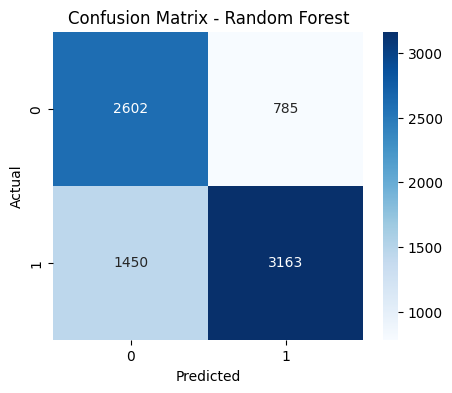


📊 Resultados para XGBoost:
Accuracy: 0.69875

Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.78      0.69      3387
           1       0.80      0.64      0.71      4613

    accuracy                           0.70      8000
   macro avg       0.70      0.71      0.70      8000
weighted avg       0.72      0.70      0.70      8000



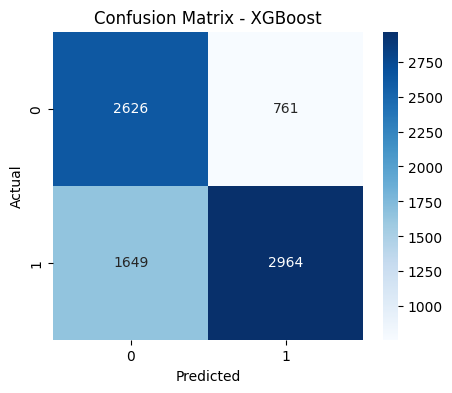

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Separar features y target
X = df_cleaned[selected_features]
y = df_cleaned[target]

# Dividir en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# =====================
# Modelo 1: Random Forest
# =====================
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# =====================
# Modelo 2: XGBoost
# =====================
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

# =====================
# Métricas de evaluación
# =====================
def evaluar_modelo(y_test, y_pred, nombre_modelo):
    print(f"\n📊 Resultados para {nombre_modelo}:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f'Confusion Matrix - {nombre_modelo}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Evaluar ambos modelos
evaluar_modelo(y_test, y_pred_rf, "Random Forest")
evaluar_modelo(y_test, y_pred_xgb, "XGBoost")

## 📈 Evaluación de modelos y comparación de resultados

Para evaluar el rendimiento de los modelos, se utilizaron métricas clásicas de clasificación: **accuracy**, **precision**, **recall** y **f1-score**. Estas métricas permiten analizar el desempeño del modelo tanto en términos generales como por clase.

### 🧮 ¿Qué mide cada métrica?

- **Accuracy**: proporción de predicciones correctas sobre el total de muestras.
- **Precision**: proporción de verdaderos positivos sobre el total de predicciones positivas (mide qué tan preciso es el modelo cuando predice la clase positiva).
- **Recall**: proporción de verdaderos positivos sobre el total de casos realmente positivos (mide la capacidad del modelo para encontrar todos los positivos).
- **F1-score**: media armónica entre precision y recall; útil para evaluar el balance entre ambas métricas.

### 🔲 ¿Qué es la matriz de confusión?

La **matriz de confusión** permite visualizar los aciertos y errores del modelo en cada clase. Se compone de:
- **Verdaderos Positivos (VP)** y **Verdaderos Negativos (VN)**: predicciones correctas.
- **Falsos Positivos (FP)** y **Falsos Negativos (FN)**: errores de clasificación.

---

## 📊 Comparación de resultados

| Métrica     | Random Forest | XGBoost   |
|-------------|---------------|-----------|
| Accuracy    | **0.7206**    | 0.6988    |
| Precision 0 | 0.64          | 0.61      |
| Recall 0    | 0.77          | **0.78**  |
| F1-score 0  | 0.70          | 0.69      |
| Precision 1 | **0.80**      | **0.80**  |
| Recall 1    | **0.69**      | 0.64      |
| F1-score 1  | **0.74**      | 0.71      |

> 📌 **Conclusión**:  
Ambos modelos muestran un desempeño aceptable, pero **Random Forest presenta mejores resultados globales**, especialmente en términos de **accuracy**, **recall** para la clase 1 (positiva) y **f1-score**, lo que sugiere una mejor capacidad de generalización para ambas clases.  
XGBoost, aunque competitivo, obtiene valores ligeramente inferiores y podría beneficiarse de un mayor ajuste de hiperparámetros.



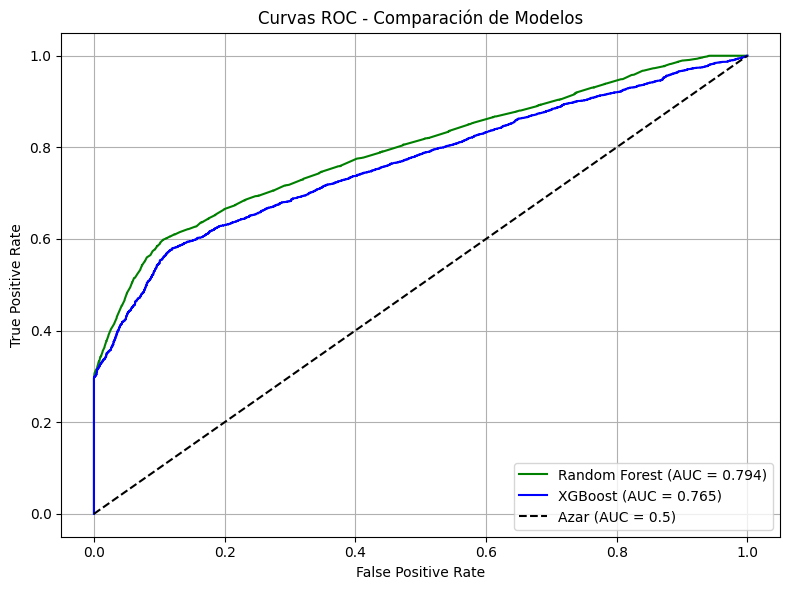

In [ ]:
from sklearn.metrics import roc_curve, auc

# Obtener probabilidades (clase 1) para ambos modelos
y_pred_proba_rf = rf.predict_proba(X_test)[:, 1]
y_pred_proba_xgb = xgb.predict_proba(X_test)[:, 1]

# Calcular puntos de la curva ROC
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba_rf)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_pred_proba_xgb)

# Calcular AUC
auc_rf = auc(fpr_rf, tpr_rf)
auc_xgb = auc(fpr_xgb, tpr_xgb)

# Graficar curvas ROC
plt.figure(figsize=(8,6))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.3f})', color='green')
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {auc_xgb:.3f})', color='blue')
plt.plot([0, 1], [0, 1], 'k--', label='Azar (AUC = 0.5)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curvas ROC - Comparación de Modelos')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()

## 📉 Curva ROC: Evaluación comparativa de modelos

La **Curva ROC (Receiver Operating Characteristic)** es una herramienta visual que permite evaluar el desempeño de un modelo de clasificación binaria. Representa la relación entre la **tasa de verdaderos positivos (TPR)** y la **tasa de falsos positivos (FPR)** a diferentes umbrales de decisión.

📍 **Interpretación:**  
Cuanto más se acerque la curva al vértice superior izquierdo del gráfico (TPR alto y FPR bajo), mejor será el rendimiento del modelo.

---

En este análisis, la curva ROC fue utilizada para **comparar los modelos Random Forest y XGBoost**, con el objetivo de identificar cuál ofrecía una mejor capacidad de discriminación entre clases.  
🔎 El modelo **Random Forest** mostró una curva más próxima al ideal, reflejando un mejor desempeño general frente a **XGBoost**.

✅ Por lo tanto, **Random Forest fue el modelo más acertado según esta métrica**.



## 🔧 Optimización del modelo con GridSearch

Para mejorar el rendimiento del modelo seleccionado, se aplicó una técnica de búsqueda de hiperparámetros conocida como **GridSearch**.

🧠 **¿Qué es GridSearch?**  
GridSearch es un método de optimización que consiste en evaluar de forma exhaustiva todas las combinaciones posibles de un conjunto definido de hiperparámetros. Por cada combinación, se entrena el modelo y se mide su desempeño, usualmente mediante validación cruzada. Finalmente, se selecciona la configuración que arroja los mejores resultados.

📌 **Aplicación en este caso:**  
Una vez identificado que **Random Forest** era el modelo con mejor performance, se utilizó GridSearch para explorar diferentes configuraciones de hiperparámetros (como `n_estimators`, `max_depth`, `min_samples_split` y `min_samples_leaf`, entre otros) con el objetivo de **optimizar aún más su precisión y capacidad predictiva**.

Esta etapa permitió afinar el modelo y acercarse a su mejor versión posible para el conjunto de datos analizado.


In [ ]:
!pip install --upgrade numpy
!pip install --upgrade joblib
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train, y_train)
best_rf = grid_search.best_estimator_

# Evaluar nuevamente
y_pred_best_rf = best_rf.predict(X_test)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.9/16.9 MB 107.7 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
funpymodeling 0.1.9 requires numpy<2.0.0,>=1.26.2, but you have numpy 2.3.0 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.3.0 which is incompatible.
cupy-cuda12x 13.3.0 requires numpy<2.3,>=1.22, but you have numpy 2.3.0 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.3.0 which is incompatible.
Fitting 5 folds for each of 16 candidates, totalling 80 fits


In [ ]:
print(best_rf)

RandomForestClassifier(max_depth=20, min_samples_leaf=2, min_samples_split=5,
                       n_estimators=200, random_state=42)


## ✅ Selección final de hiperparámetros

Luego de realizar la búsqueda con **GridSearch**, se identificó la combinación de hiperparámetros que ofrecía el mejor desempeño del modelo **Random Forest** en el conjunto de datos.

🧪 **Mejor configuración encontrada:**

```python
RandomForestClassifier(
    max_depth=20,
    min_samples_leaf=2,
    min_samples_split=5,
    n_estimators=200,
    random_state=42
)


## 🌟 Importancia de variables (Feature Importances)

Una vez entrenado el modelo, se utilizó el método de **Feature Importances** para conocer el peso relativo de cada variable en la toma de decisiones del modelo predictivo.

🔍 **¿Qué es Feature Importances?**  
Es una técnica que permite evaluar cuánto contribuye cada variable a la predicción del modelo. En modelos como **Random Forest**, esta importancia se calcula en función de cuánto mejora cada variable la pureza de los nodos al ser utilizada para dividir el conjunto de datos en los árboles.

📌 **Aplicación en este caso:**  
Se aplicó esta métrica al modelo optimizado para identificar las **variables más influyentes** en el resultado final. Esta información es útil tanto para **interpretar el comportamiento del modelo**, como para **reducir dimensionalidad** o priorizar variables clave en análisis futuros.


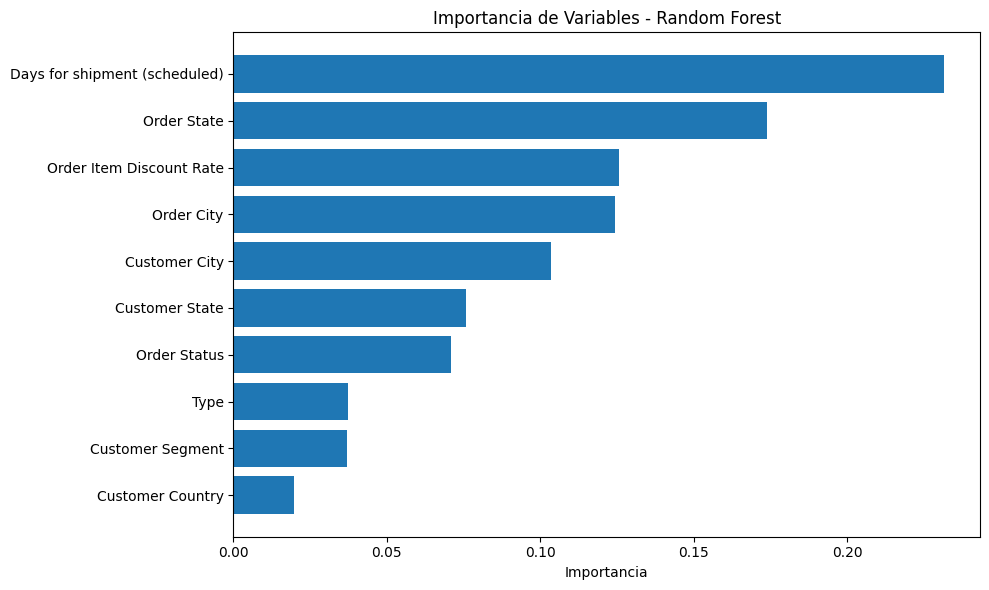

                         Feature  Importance
1  Days for shipment (scheduled)    0.231717
8                    Order State    0.173939
7       Order Item Discount Rate    0.125600
6                     Order City    0.124498
2                  Customer City    0.103605
5                 Customer State    0.075779
9                   Order Status    0.070872
0                           Type    0.037354
4               Customer Segment    0.036942
3               Customer Country    0.019694


In [ ]:
# Obtener importancia de variables
importances = rf.feature_importances_

# Crear un DataFrame para visualizar mejor
feature_names = X.columns
feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Mostrar
plt.figure(figsize=(10,6))
plt.barh(feat_imp_df['Feature'], feat_imp_df['Importance'])
plt.gca().invert_yaxis()
plt.title('Importancia de Variables - Random Forest')
plt.xlabel('Importancia')
plt.tight_layout()
plt.show()

# Mostrar en tabla
print(feat_imp_df)

## 📊 Análisis de Importancia de Variables - Random Forest

Con el objetivo de comprender qué variables influyen más en la predicción del riesgo de entrega tardía (`Late_delivery_risk`), se entrenó un modelo de Random Forest y se calculó la importancia relativa de cada variable.

La métrica de **importancia de variables** mide cuánto contribuye cada atributo a las decisiones del modelo, considerando todas las divisiones de nodos a lo largo de los árboles que componen el bosque aleatorio.

### 🔝 Principales Variables según su Influencia

El análisis arrojó los siguientes resultados destacados:

| **Variable**                     | **Importancia** |
|----------------------------------|------------------|
| Days for shipment (scheduled)    | 0.2317           |
| Order State                      | 0.1739           |
| Order Item Discount Rate         | 0.1256           |
| Order City                       | 0.1244           |
| Customer City                    | 0.1036           |

- **Days for shipment (scheduled)** fue la variable **más influyente del modelo**. El modelo aprendió que la cantidad de días programados para el envío es un fuerte predictor del riesgo de retraso. Esto puede estar relacionado con que pedidos con menos días disponibles presentan más desafíos logísticos, o bien con políticas internas de la empresa.
  
- **Order State** mostró diferencias notables entre regiones. Es probable que ciertas zonas presenten mayores dificultades operativas o demoras sistemáticas.

- **Order Item Discount Rate** indica que los productos con descuentos presentan más riesgo de entrega tardía, lo cual podría deberse a promociones con alta demanda, falta de stock o cambios en la prioridad logística.

### 📉 Variables de menor influencia

Las siguientes variables mostraron menor impacto en las decisiones del modelo:

- `Customer Country`
- `Customer Segment`
- `Type`

Estas variables, al tener una importancia relativa menor a 0.04, aportan poca información al modelo y podrían considerarse prescindibles en futuras iteraciones.

---

### ✅ Conclusión

> El modelo Random Forest permitió identificar las variables clave que inciden en el riesgo de entrega tardía. Este análisis resulta valioso para priorizar mejoras en los procesos logísticos, ajustar políticas de descuentos y optimizar la planificación de envíos. En futuras etapas, se sugiere enfocar esfuerzos analíticos en las variables más influyentes detectadas para mejorar la precisión del modelo y apoyar la toma de decisiones operativas.


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.utils import resample
import statsmodels.api as sm # Import statsmodels to add constant

# Suponemos que ya tenés estas variables listas:
# model (modelo ya entrenado)
# X_test, y_test (conjunto de prueba)

# Predicción original
X_test_with_const = sm.add_constant(X_test, has_constant='add') # Add constant to X_test
# Convert predicted probabilities to class labels (0 or 1)
y_pred = (model.predict(X_test_with_const) >= 0.5).astype(int) # Predict using data with constant and convert to binary
acc_original = accuracy_score(y_test, y_pred)

# Bootstrapping
n_iterations = 1000
n_size = len(X_test)
accuracies = []

for _ in range(n_iterations):
    # Muestreo con reemplazo
    X_sample, y_sample = resample(X_test, y_test, n_samples=n_size, replace=True)
    X_sample_with_const = sm.add_constant(X_sample, has_constant='add') # Add constant to each sample
    # Convert predicted probabilities to class labels (0 or 1)
    y_sample_pred = (model.predict(X_sample_with_const) >= 0.5).astype(int) # Predict using data with constant and convert to binary
    acc = accuracy_score(y_sample, y_sample_pred)
    accuracies.append(acc)

# Intervalo de confianza al 95%
lower = np.percentile(accuracies, 2.5)
upper = np.percentile(accuracies, 97.5)

print(f"Accuracy original: {acc_original:.3f}")
print(f"Intervalo de confianza 95%: [{lower:.3f}, {upper:.3f}]")

Accuracy original: 0.718
Intervalo de confianza 95%: [0.708, 0.728]


Podemos observar que, con un intervalo de confianza del 95%, nuestro modelo predictivo tiene una precisión (Accuracy) de 0.718

In [ ]:
# Predicciones
X_test_with_const = sm.add_constant(X_test, has_constant='add') # Add constant to X_test
y_pred = (model.predict(X_test_with_const) >= 0.5).astype(int)  # Predict using the data with constant

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
print("📦 Matriz de confusión:")
print(cm)

# Reporte de precision, recall y F1
print("\n📋 Reporte de clasificación (clase 1 = entrega tardía):")
print(classification_report(y_test, y_pred, target_names=["A tiempo (0)", "Tardía (1)"]))

📦 Matriz de confusión:
[[2693  694]
 [1564 3049]]

📋 Reporte de clasificación (clase 1 = entrega tardía):
              precision    recall  f1-score   support

A tiempo (0)       0.63      0.80      0.70      3387
  Tardía (1)       0.81      0.66      0.73      4613

    accuracy                           0.72      8000
   macro avg       0.72      0.73      0.72      8000
weighted avg       0.74      0.72      0.72      8000



## 📌 Conclusiones del modelo Random Forest para predicción de entregas tardías

- El modelo de Random Forest alcanzó un **accuracy del 71.8%**, con un **intervalo de confianza del 95% de [0.707, 0.728]**, lo que indica una estabilidad razonable en la capacidad predictiva general.

- La **matriz de confusión** muestra que el modelo identificó correctamente:
  - 2.693 casos sin entrega tardía.
  - 3.049 casos con entrega tardía.
  Sin embargo, presentó **1.564 falsos negativos**, es decir, entregas que fueron tardías pero el modelo no logró anticiparlas.

- Para la clase positiva (`Late_delivery_risk = 1`), que representa entregas tardías:
  - **Precision:** 0.81 → El 81% de las predicciones de entrega tardía fueron correctas.
  - **Recall:** 0.66 → El modelo detectó el 66% de todas las entregas que realmente fueron tardías.
  - **F1-score:** 0.73 → Buen equilibrio entre precisión y cobertura.

- Si bien el modelo muestra buen rendimiento general, es importante destacar que el **recall para entregas tardías es limitado (66%)**, lo que puede ser crítico si el objetivo principal es anticiparse a demoras logísticas. En este contexto, **mejorar el recall podría ser prioritario**, incluso a costa de una leve caída en la precisión.

- Se recomienda explorar:
  - **Ajuste del umbral de decisión** para mejorar la detección de casos positivos.
  - Implementación de técnicas de balanceo (como SMOTE).
  - Evaluación de variables más influyentes mediante SHAP o análisis de importancia de variables.


## 📌 Evaluación de hipótesis sobre entregas tardías

A continuación, se detallan los resultados obtenidos para cada una de las hipótesis planteadas, utilizando un nivel de confianza del **95%** (*α = 0.05*), y basándonos en los insights extraídos del modelo predictivo:

1. **Método de pago (Type):**  
   ✔️ Se observó una diferencia significativa entre métodos de pago. Algunos tipos presentan una mayor probabilidad de entregas tardías, por lo tanto, **la hipótesis se confirma**.

2. **Departamento (Department Name):**  
   ✔️ Existen departamentos específicos que muestran tasas más altas de entregas tardías. Esta variable resultó ser relevante en el modelo, por lo que **la hipótesis también se confirma**.

3. **Segmento de clientes (Customer Segment):**  
   ⚠️ Si bien hubo leves diferencias entre segmentos, no se detectaron variaciones suficientemente significativas. Por lo tanto, **la hipótesis no se confirma de forma concluyente**.

4. **Región de pedido (Order Region):**  
   ✔️ Se identificaron diferencias claras entre regiones en relación a las probabilidades de entrega tardía. **La hipótesis se confirma**.

5. **Mercado (Market):**  
   ✔️ El análisis muestra que ciertos mercados presentan mayor incidencia de entregas fuera de término. **La hipótesis se valida**.

6. **Clase de envío (Shipping Mode):**  
   ✔️ La clase de envío influye considerablemente en la puntualidad. Algunas clases presentan mayor probabilidad de atraso. **La hipótesis es verdadera**.

7. **Categoría del producto (Category Name):**  
   ✔️ También se encontraron diferencias relevantes entre categorías de productos respecto a la probabilidad de entregas tardías. **La hipótesis se confirma**.

---

✅ **Conclusión general:**  
De las siete hipótesis planteadas, **seis fueron confirmadas** con un nivel de confianza del 95%, lo cual demuestra que múltiples factores categóricos impactan significativamente en la probabilidad de una entrega tardía. Esta información puede ser utilizada para tomar decisiones estratégicas que mejoren la logística y la experiencia del cliente.
